# 基础函数工具

In [1]:
import sys
sys.path.append('../../')

In [2]:
import numpy as np
import copy

from circuits.ecm import ECM

# 绘图函数 pkl函数
%matplotlib widget
from utils.visualize_utils.IS_plots.ny import nyquist_plot_1, nyquist_multiPlots_1

from utils.file_utils.filename_utils import get_date_prefix
from utils.file_utils.pickle_utils import *
from circuits.elements import *

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt

def nyquist_multiPlots_0(z_pack_list, x_lim=[0, 50000], y_lim=[0, 50000],img_dict=None,grid_flag=False, plot_label_list=None):
    """
    Function
        1-同时画出多条IS，起到对比作用
        2-根据索引，标出人为扰动的点
    """
    marker_list = ['bo-', 'g^-', 'rv-','c.-','m<-']
    
    fig, ax = plt.subplots()
    for i, z_list in enumerate(z_pack_list):
        z_real_list = [z.real for z in z_list]
        z_imag_list = [z.imag for z in z_list]
        z_inv_imag_list = [-z_imag for z_imag in z_imag_list]
        
        fmt = marker_list[i]
        if plot_label_list is not None:
            ax.plot(z_real_list, z_inv_imag_list, fmt, label=plot_label_list[i])
        else:
            ax.plot(z_real_list, z_inv_imag_list, fmt)
        
#         z = z_list[i]
#         if i == 0: # index = 0 --> Ideal IS:
#             ax.annotate(text='Real:({0}, {1})'.format(z.real,-z.imag), xy=(z.real,-z.imag))
#         else:
#             ax.annotate(text='Disturb:({0}, {1})'.format(z.real,-z.imag), xy=(z.real,-z.imag), textcoords='offset points', fontsize=16,
#                         arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))
        # r'$xxxx$'
        # xy=蓝色点位置
        # xytext：描述框相对xy位置
        # textcoords='offset points'，以xy为原点偏移xytext
        # arrowprops = 画弧线箭头，'---->', rad=.2-->0.2弧度
        # plt.annotate(r'$2x+1=%s$'%y0, xy=(x0,y0), xytext=(+30,-30), textcoords='offset points', fontsize=16,
        #              arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'))        
        
#         if plot_label_list is not None:
#             ax.plot(z_real_list, z_inv_imag_list, fmt=marker_list[i], label=plot_label_list[i])
#         else:
#             ax.plot(z_real_list, z_inv_imag_list, fmt=marker_list[i])
    
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_xlabel('Z$_{real}$ [$\Omega$]') #设置x轴名称 x label
    ax.set_ylabel('-Z$_{imag}$ [$\Omega$]') #设置y轴名称 y label
    ax.set_aspect("equal")

    plt.legend()
    plt.show()

In [9]:
# 准备高斯函数 对理想数据中的【一个】点进行扰动
def gauss_disturb_1(i, z_arr, disturb_degree):
    """
    disturb_degree: str
        S/M/H
    """
    u = 0
    z = z_arr[i]
    z_abs = np.sqrt(z.real ** 2 + z.imag ** 2)
    if disturb_degree == 'S':
        sigma = z_abs / 10000
    elif disturb_degree == 'M':
        sigma = z_abs / 1000
    elif disturb_degree == 'H':
        sigma = z_abs / 100
    z_r = z.real + np.random.normal(loc=u, scale=sigma)
    z_i = z.imag + np.random.normal(loc=u, scale=sigma)
    disturbed_z_arr = copy.deepcopy(z_arr)
    disturbed_z_arr[i] = z_r + 1j * z_i
    return disturbed_z_arr

In [11]:
# 准备高斯函数 对理想数据中的【2个】点进行扰动
def gauss_disturbTwoPoints_0(i_iter, z_arr, disturb_degree_str):
    """
    i_iter: list/tuple
        [5,25]
        [5,55]
        [25,55]
    disturb_degree_str: str
        H_H
        H_M
        M_H
        M_M
    """
    index0, index1 = i_iter
    disturb_degree0, disturb_degree1 = disturb_degree_str.split('_')
    
    # disturb the first point
    disturbed_z_arr_0 = gauss_disturb_1(i=index0, z_arr=z_arr, disturb_degree=disturb_degree0)
    
    # disturb the second point
    disturbed_z_arr_1 = gauss_disturb_1(i=index1, z_arr=disturbed_z_arr_0, disturb_degree=disturb_degree1)

    return disturbed_z_arr_1

In [12]:
# 准备高斯函数 对理想数据中的【3个】点进行扰动
def gauss_disturbThreePoints_0(z_arr, disturb_degree_str):
    """
    i_iter: list/tuple
        [5,25,55]
    disturb_degree_str: str
        H_H_H
        H_H_M
        H_M_H
        H_M_M
        ------
        M_H_H
        M_H_M
        M_M_H
        M_M_M
    """
    index0, index1, index2 = 5, 25, 55
    disturb_degree0, disturb_degree1, disturb_degree2 = disturb_degree_str.split('_')
    
    # disturb the first point
    disturbed_z_arr_0 = gauss_disturb_1(i=index0, z_arr=z_arr, disturb_degree=disturb_degree0)
    
    # disturb the second point
    disturbed_z_arr_1 = gauss_disturb_1(i=index1, z_arr=disturbed_z_arr_0, disturb_degree=disturb_degree1)

    # disturb the third point
    disturbed_z_arr_2 = gauss_disturb_1(i=index2, z_arr=disturbed_z_arr_1, disturb_degree=disturb_degree2)
    
    return disturbed_z_arr_2

In [5]:
# 准备高斯函数 对理想数据进行扰动
def gauss_disturb(i, z_list, disturb_degree):
    u = 0
    z = z_list[i]
    z_abs = np.sqrt(z.real ** 2 + z.imag ** 2)
    if disturb_degree == 'S':
        sigma = z_abs / 10000
    elif disturb_degree == 'M':
        sigma = z_abs / 1000
    elif disturb_degree == 'H':
        sigma = z_abs / 100
    z_r = z.real + np.random.normal(loc=u, scale=sigma)
    z_i = z.imag + np.random.normal(loc=u, scale=sigma)
    disturbed_z_list = copy.deepcopy(z_list)
    disturbed_z_list[i] = z_r + 1j * z_i
    return disturbed_z_list

# 准备实验数据

仿照paper《A Method for Improving the Robustness of linear Kramers-KronigValidity Tests》中的做法，在某个阻抗点上施加一个随机的扰动

![img](./rbp_files/0/add_random_noise2Z.jpg)

## 准备R(RC)相关的IS

### 理想的R(RC)的IS

In [11]:
# ecm_3_014 --> R(RC) --> R0(R1C0)
R0 = 100 # ohm
R1 = 200 # ohm
C0 = 8*1e-5 # F
RaRCb_para_list = [R0, R1, C0]

In [12]:
# 模拟理想数据
ecm = ECM(ecm_serial='3_014', proba=1)
z_list = ecm.simulate(fre_setting={'start': 7, 'end': -3, 'points': 5}, para_list=RaRCb_para_list)
w_arr = ecm.w_arr

In [11]:
%matplotlib widget
nyquist_plot_1(z_list=z_list, x_lim=[50, 350], y_lim=[-5, 120],img_dict=None,grid_flag=False, plot_label='Ideal R(RC) IS')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# 存储理想数据
ecm_pkl_fn = get_date_prefix() + 'ecm.pkl'
pickle_file(obj=ecm,fn=ecm_pkl_fn,fp='./rbp_files/0/')

In [3]:
# load理想数据
reload_ecm = load_pickle_file(fp='./rbp_files/0/R(RC)_ecm_pkl/',
                              fn='2021_08_04_ecm.pkl')
print(len(reload_ecm.z_sim_list))
print(reload_ecm.w_arr)
print(reload_ecm.z_sim_list)

50
[6.28318531e+07 3.96442192e+07 2.50138112e+07 1.57826479e+07
 9.95817762e+06 6.28318531e+06 3.96442192e+06 2.50138112e+06
 1.57826479e+06 9.95817762e+05 6.28318531e+05 3.96442192e+05
 2.50138112e+05 1.57826479e+05 9.95817762e+04 6.28318531e+04
 3.96442192e+04 2.50138112e+04 1.57826479e+04 9.95817762e+03
 6.28318531e+03 3.96442192e+03 2.50138112e+03 1.57826479e+03
 9.95817762e+02 6.28318531e+02 3.96442192e+02 2.50138112e+02
 1.57826479e+02 9.95817762e+01 6.28318531e+01 3.96442192e+01
 2.50138112e+01 1.57826479e+01 9.95817762e+00 6.28318531e+00
 3.96442192e+00 2.50138112e+00 1.57826479e+00 9.95817762e-01
 6.28318531e-01 3.96442192e-01 2.50138112e-01 1.57826479e-01
 9.95817762e-02 6.28318531e-02 3.96442192e-02 2.50138112e-02
 1.57826479e-02 9.95817762e-03]
[(100.00000000019789-0.00019894367886467228j), (100.00000000049708-0.0003153044823153175j), (100.00000000124862-0.0004997239275721447j), (100.00000000313639-0.0007920090509115456j), (100.00000000787826-0.0012552497531275358j), (100.0

In [5]:
reload_ecm.fre_arr

array([1.00000000e+07, 6.30957344e+06, 3.98107171e+06, 2.51188643e+06,
       1.58489319e+06, 1.00000000e+06, 6.30957344e+05, 3.98107171e+05,
       2.51188643e+05, 1.58489319e+05, 1.00000000e+05, 6.30957344e+04,
       3.98107171e+04, 2.51188643e+04, 1.58489319e+04, 1.00000000e+04,
       6.30957344e+03, 3.98107171e+03, 2.51188643e+03, 1.58489319e+03,
       1.00000000e+03, 6.30957344e+02, 3.98107171e+02, 2.51188643e+02,
       1.58489319e+02, 1.00000000e+02, 6.30957344e+01, 3.98107171e+01,
       2.51188643e+01, 1.58489319e+01, 1.00000000e+01, 6.30957344e+00,
       3.98107171e+00, 2.51188643e+00, 1.58489319e+00, 1.00000000e+00,
       6.30957344e-01, 3.98107171e-01, 2.51188643e-01, 1.58489319e-01,
       1.00000000e-01, 6.30957344e-02, 3.98107171e-02, 2.51188643e-02,
       1.58489319e-02, 1.00000000e-02, 6.30957344e-03, 3.98107171e-03,
       2.51188643e-03, 1.58489319e-03])

In [ ]:
z0 = reload_ecm.z_sim_list[0]
z0.imag

![img](./rbp_files/0/R(RC)_img/R(RC).png)

### 理想的R(RC)+轻微扰动的IS

![img](./rbp_files/0/slight-disturb.jpg)

#### 高频

In [8]:
# High Fre --> HF + Small disturb index = 5
z_HF_S_list = gauss_disturb(i=5, z_list=ecm.z_sim_list, disturb_degree='S')

In [15]:
# 和理想数据的图像对比
z_HF_S_pack_list = [z_list, z_HF_S_list]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
# load理想数据
ecm_HF_S = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_05_ecm_HF_S.pkl')
z_HF_S_list = ecm_HF_S.z_sim_list
z_HF_S_pack_list = [z_list, z_HF_S_list]

In [23]:
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HF_S_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'HF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_HF_S.png)

In [24]:
# Enlarge the difference
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HF_S_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'HF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_HF_S_enlarge.png)

In [18]:
# save ECM
ecm_HF_S = copy.deepcopy(ecm)
ecm_HF_S.z_sim_list = z_HF_S_list
ecm_HF_S_pkl_fn = get_date_prefix() + 'ecm_HF_S.pkl'
pickle_file(obj=ecm_HF_S, fn=ecm_HF_S_pkl_fn, fp='./rbp_files/0/')

#### 中频

In [23]:
# Middle Fre --> MF + Small disturb index = 25
z_MF_S_list = gauss_disturb(i=25, z_list=ecm.z_sim_list, disturb_degree='S')

In [25]:
z_MF_S_list[25]

(101.94768082913833-19.704564871643495j)

In [24]:
# 和理想数据的图像对比
z_MF_S_pack_list = [z_list, z_MF_S_list]
nyquist_multiPlots_0(z_pack_list=z_MF_S_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [25]:
# load理想数据
ecm_MF_S = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_05_ecm_MF_S.pkl')
z_MF_S_list = ecm_MF_S.z_sim_list
z_MF_S_pack_list = [z_list, z_MF_S_list]
nyquist_multiPlots_0(z_pack_list=z_MF_S_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_MF_S.png)

In [26]:
nyquist_multiPlots_0(z_pack_list=z_MF_S_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_MF_S_enlarge.png)

In [27]:
# save ECM
ecm_MF_S = copy.deepcopy(ecm)
ecm_MF_S.z_sim_list = z_MF_S_list
ecm_MF_S_pkl_fn = get_date_prefix() + 'ecm_MF_S.pkl'
pickle_file(obj=ecm_MF_S, fn=ecm_MF_S_pkl_fn, fp='./rbp_files/0/')

#### 低频

In [28]:
# Low Fre --> LF + Small disturb index = 45
z_LF_S_list = gauss_disturb(i=45, z_list=ecm.z_sim_list, disturb_degree='S')

In [30]:
z_LF_S_list[45]

(299.99524108993023-0.16569658900098105j)

In [29]:
# 和理想数据的图像对比
z_LF_S_pack_list = [z_list, z_LF_S_list]
nyquist_multiPlots_0(z_pack_list=z_LF_S_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'LF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
# load理想数据
ecm_LF_S = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_05_ecm_LF_S.pkl')
z_LF_S_list = ecm_LF_S.z_sim_list
z_LF_S_pack_list = [z_list, z_LF_S_list]
nyquist_multiPlots_0(z_pack_list=z_LF_S_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_LF_S.png)

In [14]:
nyquist_multiPlots_0(z_pack_list=z_LF_S_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'LF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_LF_S_enlarge.png)

In [32]:
# save ECM
ecm_LF_S = copy.deepcopy(ecm)
ecm_LF_S.z_sim_list = z_LF_S_list
ecm_LF_S_pkl_fn = get_date_prefix() + 'ecm_LF_S.pkl'
pickle_file(obj=ecm_LF_S, fn=ecm_LF_S_pkl_fn, fp='./rbp_files/0/')

### 理想的R(RC)+中等扰动的IS

![img](./rbp_files/0/medium-disturb.jpg)

#### 高频

In [33]:
# High Fre --> HF + MIddle disturb index = 5
z_HF_M_list = gauss_disturb(i=5, z_list=ecm.z_sim_list, disturb_degree='M')

In [34]:
# 和理想数据的图像对比
z_HF_M_pack_list = [z_list, z_HF_M_list]
nyquist_multiPlots_0(z_pack_list=z_HF_M_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'HF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
# load理想数据
ecm_HF_M = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_05_ecm_HF_M.pkl')
z_HF_M_list = ecm_HF_M.z_sim_list
z_HF_M_pack_list = [z_list, z_HF_M_list]
nyquist_multiPlots_0(z_pack_list=z_HF_M_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'HF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_HF_M.png)

In [17]:
nyquist_multiPlots_0(z_pack_list=z_HF_M_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'HF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_HF_M_enlarge.png)

In [36]:
# save ECM
ecm_HF_M = copy.deepcopy(ecm)
ecm_HF_M.z_sim_list = z_HF_M_list
ecm_HF_M_pkl_fn = get_date_prefix() + 'ecm_HF_M.pkl'
pickle_file(obj=ecm_HF_M, fn=ecm_HF_M_pkl_fn, fp='./rbp_files/0/')

#### 中频

In [40]:
# Middle Fre --> MF + Middle disturb index = 25
z_MF_M_list = gauss_disturb(i=25, z_list=ecm.z_sim_list, disturb_degree='M')

In [41]:
# 和理想数据的图像对比
z_MF_M_pack_list = [z_list, z_MF_M_list]
nyquist_multiPlots_0(z_pack_list=z_MF_M_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
# load理想数据
ecm_MF_M = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_05_ecm_MF_M.pkl')
z_MF_M_list = ecm_MF_M.z_sim_list
z_MF_M_pack_list = [z_list, z_MF_M_list]
nyquist_multiPlots_0(z_pack_list=z_MF_M_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_MF_M.png)

In [19]:
nyquist_multiPlots_0(z_pack_list=z_MF_M_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_MF_M_enlarge.png)

In [20]:
# save ECM
ecm_MF_M = copy.deepcopy(ecm)
ecm_MF_M.z_sim_list = z_MF_M_list
ecm_MF_M_pkl_fn = get_date_prefix() + 'ecm_MF_M.pkl'
pickle_file(obj=ecm_MF_M, fn=ecm_MF_M_pkl_fn, fp='./rbp_files/0/')

#### 低频

In [44]:
# Low Fre --> LF + Middle disturb index = 45
z_LF_M_list = gauss_disturb(i=45, z_list=ecm.z_sim_list, disturb_degree='M')

In [45]:
# 和理想数据的图像对比
z_LF_M_pack_list = [z_list, z_LF_M_list]
nyquist_multiPlots_0(z_pack_list=z_LF_M_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'LF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
# load理想数据
ecm_LF_M = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_06_ecm_LF_M.pkl')
z_LF_M_list = ecm_LF_M.z_sim_list
z_LF_M_pack_list = [z_list, z_LF_M_list]
nyquist_multiPlots_0(z_pack_list=z_LF_M_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'LF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_LF_M.png)

In [23]:
nyquist_multiPlots_0(z_pack_list=z_LF_M_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'LF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_LF_M_enlarge.png)

In [47]:
# save ECM
ecm_LF_M = copy.deepcopy(ecm)
ecm_LF_M.z_sim_list = z_LF_M_list
ecm_LF_M_pkl_fn = get_date_prefix() + 'ecm_LF_M.pkl'
pickle_file(obj=ecm_LF_M, fn=ecm_LF_M_pkl_fn, fp='./rbp_files/0/')

### 理想的R(RC)+剧烈扰动的IS

![img](./rbp_files/0/strong-disturb.jpg)

#### 高频

In [48]:
# High Fre --> HF + Strong disturb index = 5 H
z_HF_H_list = gauss_disturb(i=5, z_list=ecm.z_sim_list, disturb_degree='H')

In [49]:
# 和理想数据的图像对比
z_HF_H_pack_list = [z_list, z_HF_H_list]
nyquist_multiPlots_0(z_pack_list=z_HF_H_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'HF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [25]:
# load理想数据
ecm_HF_H = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_06_ecm_HF_H.pkl')
z_HF_H_list = ecm_HF_H.z_sim_list
z_HF_H_pack_list = [z_list, z_HF_H_list]
nyquist_multiPlots_0(z_pack_list=z_HF_H_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'HF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_HF_H.png)

In [26]:
nyquist_multiPlots_0(z_pack_list=z_HF_H_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'HF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_HF_H_enlarge.png)

In [51]:
# save ECM
ecm_HF_H = copy.deepcopy(ecm)
ecm_HF_H.z_sim_list = z_HF_H_list
ecm_HF_H_pkl_fn = get_date_prefix() + 'ecm_HF_H.pkl'
pickle_file(obj=ecm_HF_H, fn=ecm_HF_H_pkl_fn, fp='./rbp_files/0/')

#### 中频

In [52]:
# Middle Fre --> MF + Strong disturb index = 25 H
z_MF_H_list = gauss_disturb(i=25, z_list=ecm.z_sim_list, disturb_degree='H')

In [53]:
# 和理想数据的图像对比
z_MF_H_pack_list = [z_list, z_MF_H_list]
nyquist_multiPlots_0(z_pack_list=z_MF_H_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [27]:
# load理想数据
ecm_MF_H = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_06_ecm_MF_H.pkl')
z_MF_H_list = ecm_MF_H.z_sim_list
z_MF_H_pack_list = [z_list, z_MF_H_list]
nyquist_multiPlots_0(z_pack_list=z_MF_H_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_MF_H.png)

In [28]:
nyquist_multiPlots_0(z_pack_list=z_MF_H_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'MF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_MF_H_enlarge.png)

In [55]:
# save ECM
ecm_MF_H = copy.deepcopy(ecm)
ecm_MF_H.z_sim_list = z_MF_H_list
ecm_MF_H_pkl_fn = get_date_prefix() + 'ecm_MF_H.pkl'
pickle_file(obj=ecm_MF_H, fn=ecm_MF_H_pkl_fn, fp='./rbp_files/0/')

#### 低频

In [56]:
# Low Fre --> LF + Strong disturb index = 45 H
z_LF_H_list = gauss_disturb(i=45, z_list=ecm.z_sim_list, disturb_degree='H')

In [57]:
# 和理想数据的图像对比
z_LF_H_pack_list = [z_list, z_LF_H_list]
nyquist_multiPlots_0(z_pack_list=z_LF_H_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'LF_H'])

C:/Users/admin/AppData/Local/Temp/xpython_111664/3862726949.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
# load理想数据
ecm_LF_H = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_06_ecm_LF_H.pkl')
z_LF_H_list = ecm_LF_H.z_sim_list
z_LF_H_pack_list = [z_list, z_LF_H_list]
nyquist_multiPlots_0(z_pack_list=z_LF_H_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'LF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_LF_H.png)

In [31]:
nyquist_multiPlots_0(z_pack_list=z_LF_H_pack_list, x_lim=[50, 350], y_lim=[-10, 120], plot_label_list=['Ideal R(RC) IS', 'LF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

![img](./rbp_files/0/R(RC)_img/R(RC)_LF_H_enlarge.png)

In [59]:
# save ECM
ecm_LF_H = copy.deepcopy(ecm)
ecm_LF_H.z_sim_list = z_LF_H_list
ecm_LF_H_pkl_fn = get_date_prefix() + 'ecm_LF_H.pkl'
pickle_file(obj=ecm_LF_H, fn=ecm_LF_H_pkl_fn, fp='./rbp_files/0/')

## 准备R(RC)-1相关的IS

由于Impedance和我的code对于R(RC)拟合得到的理想的IS进行Lin-KK均未得到理想的效果，根据观察，Vogit复现的Nyquist的高低频与IS出入较大，怀疑是IS的高低频上的数据过于密集，在此分别缩小高频和低频的范围，再次拟合一批数据进行尝试

### 理想的R(RC)-1的IS

In [7]:
# ecm_3_014 --> R(RC) --> R0(R1C0)
R0 = 100 # ohm
R1 = 200 # ohm
C0 = 8*1e-5 # F
RaRCb_para_list = [R0, R1, C0]

In [12]:
# 模拟理想数据
RaRCb1_ecm = ECM(ecm_serial='3_014', proba=1)
RaRCb1_ecm.simulate_Z(fre_setting={'start': 4, 'end': -1, 'points': 5}, para_list=RaRCb_para_list)
RaRCb1_z_list = RaRCb1_ecm.z_sim_arr.tolist()
RaRCb1_w_arr = RaRCb1_ecm.w_arr

In [13]:
%matplotlib widget
nyquist_plot_1(z_list=RaRCb1_z_list, x_lim=[50, 350], y_lim=[-5,120],img_dict=None,grid_flag=False, plot_label='Ideal R(RC)1 IS')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
# 存储理想数据
ecm_pkl_fn = get_date_prefix() + 'ecm1.pkl'
pickle_file(obj=ecm,fn=ecm_pkl_fn,fp='./rbp_files/0/R(RC)1_ecm_pkl/')

## 准备R(RC)(RW)+单个异常点相关的IS

《paper： A Method for Improving the Robustness of linear Kramers-KronigValidity Tests》-Fig 2-中介绍R(RC)(RW)

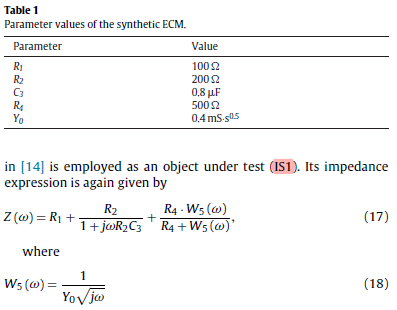

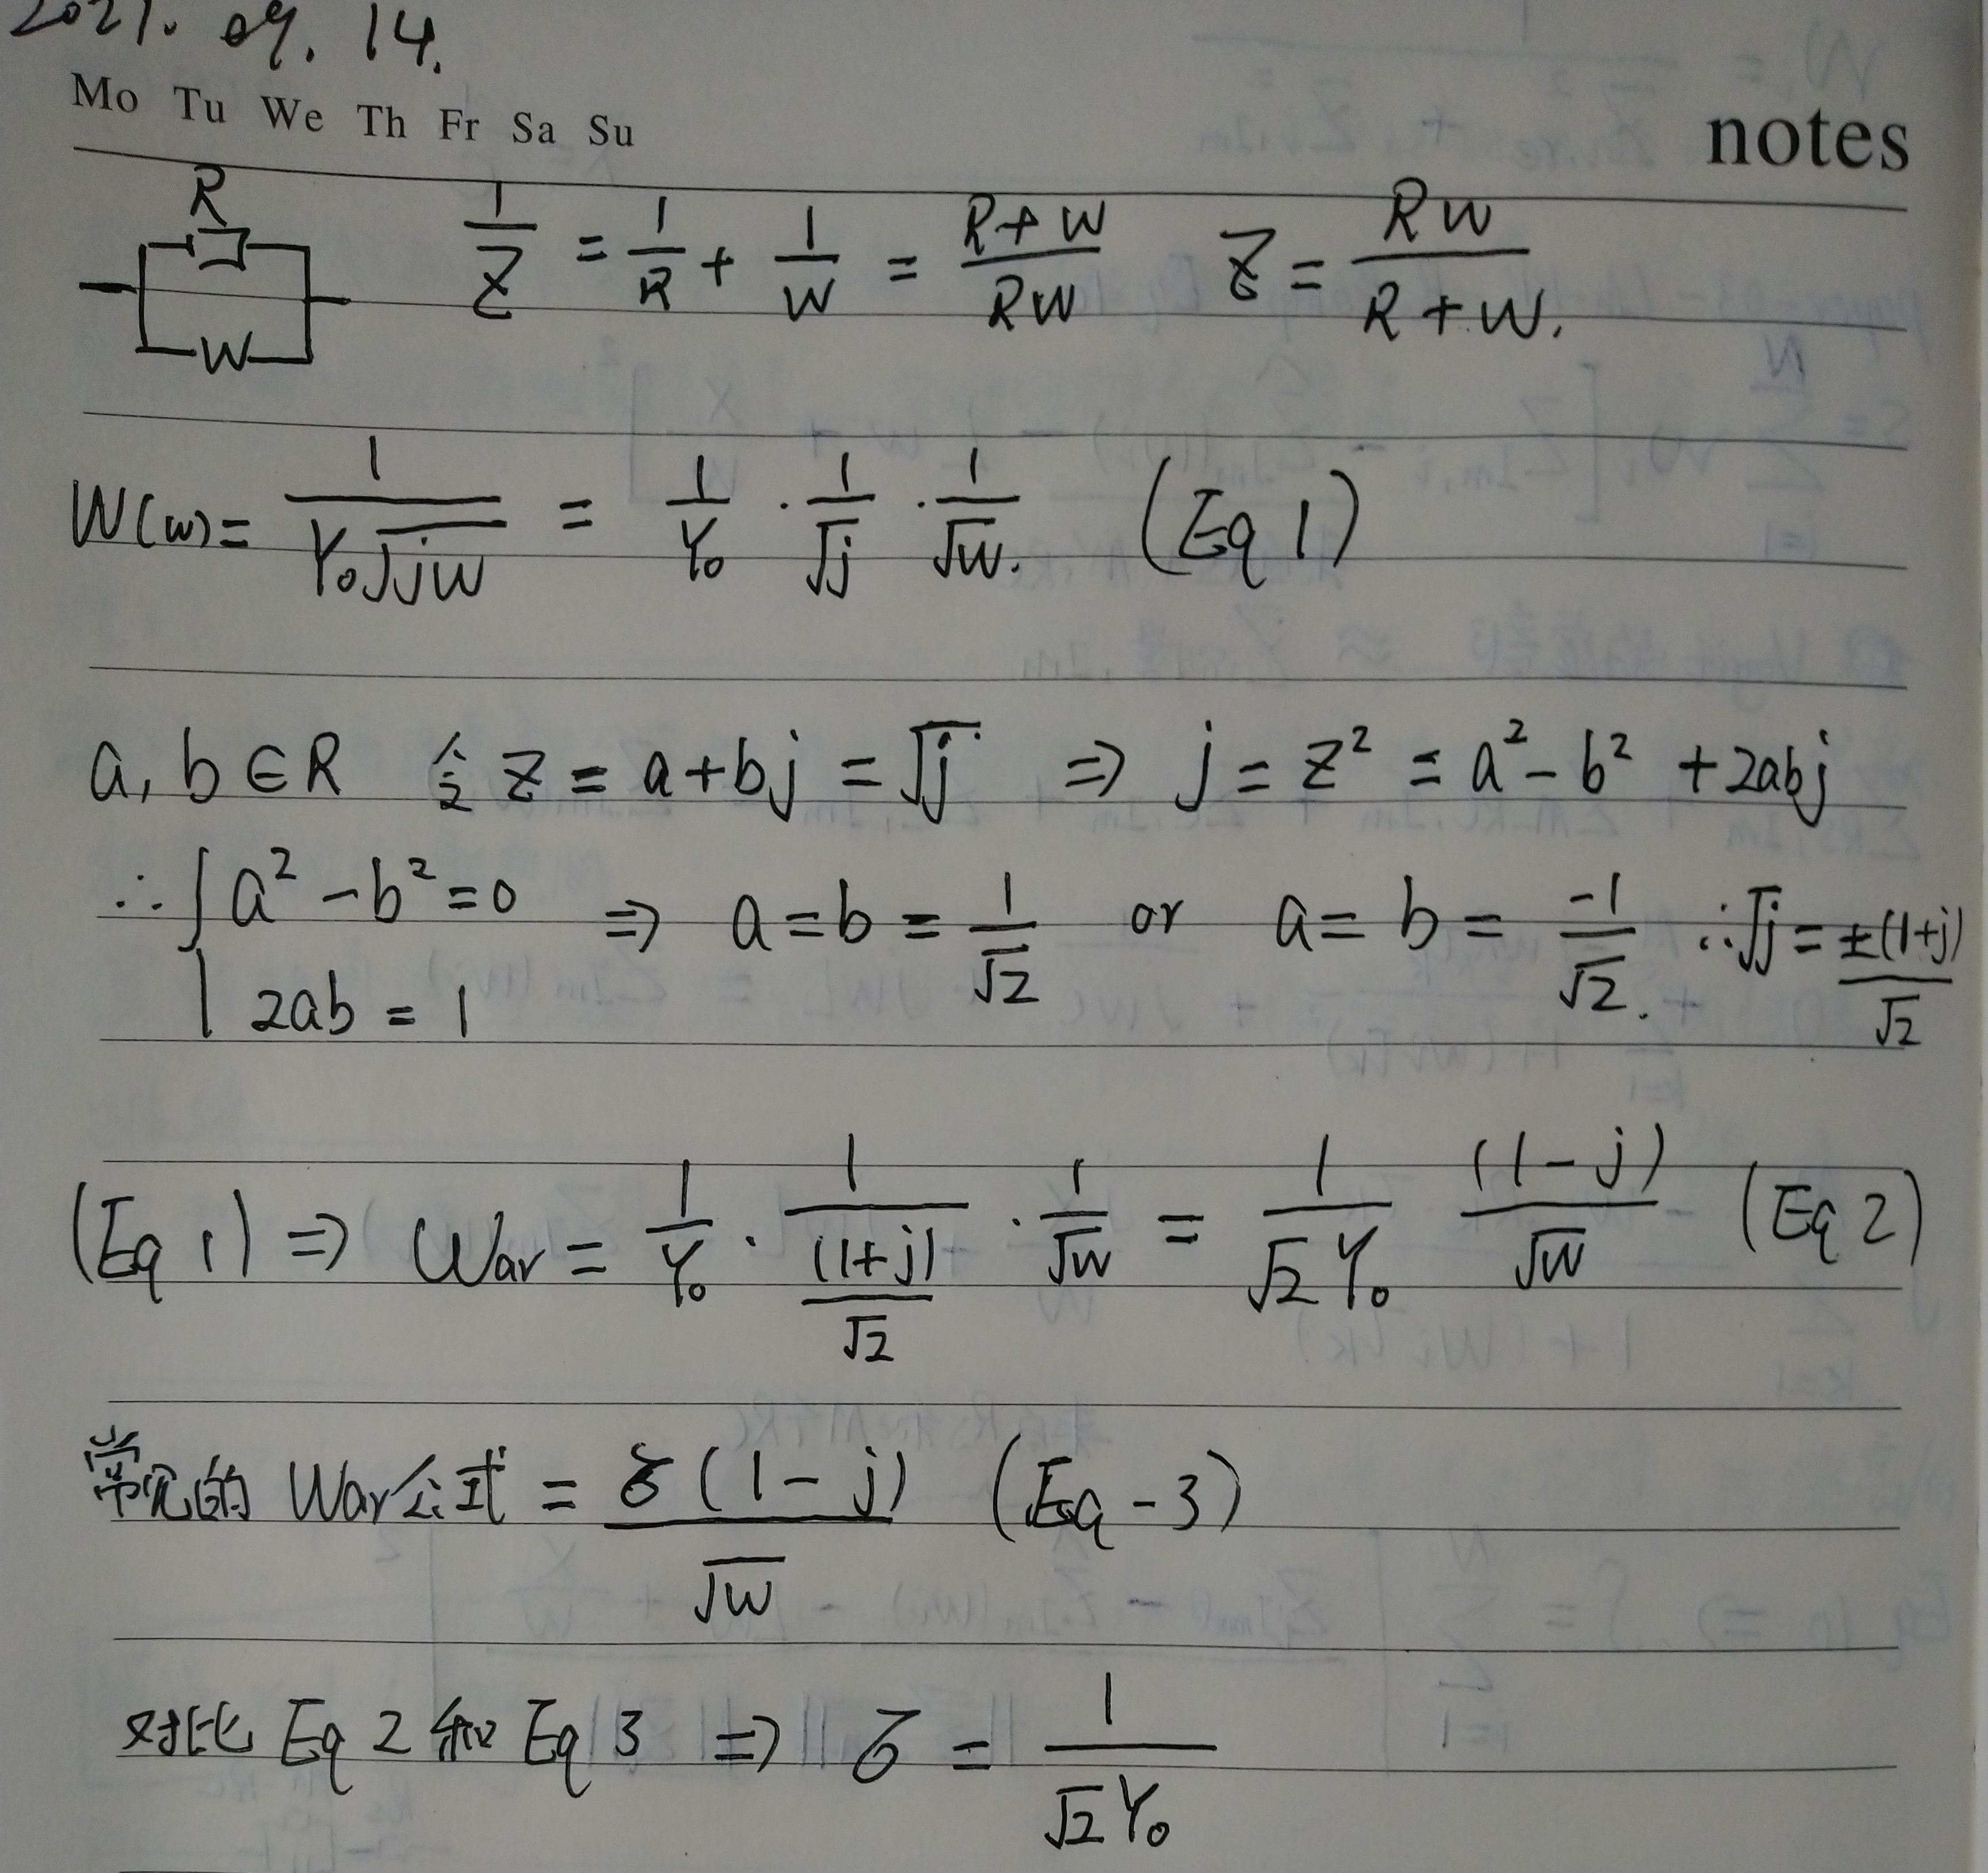

### 理想的R(RC)(RW)的IS

In [14]:
R1 = 100
R2 = 200
C3 = 0.8 * 1e-6
R4 = 500
# Y5 = 0.4
Y5 = 0.4 * 1e-3
sigma6 = 1 / (math.sqrt(2) * Y5)

In [15]:
def RaRCbaRWb_0(w, R1, R2, C3, R4, sigma):
    z = R1 + 1 / (1/R2 + 1/ele_C(w, C3)) + 1 / (1/R4 + 1/ele_Warburg(w, sigma))
    return z

In [3]:
from utils.frequency_generator import fre_generator
# The frequency range for allsimulations was chosen to be from 1 uHz to 10 MHz.
fre_list, w_list = fre_generator(f_start=6, f_end=-6, pts_decade=5)

In [9]:
fre_list[5]

100000.0

In [7]:
fre_list[25]

10.0

In [8]:
fre_list[55]

1e-05

In [17]:
RaRCbaRWb_arr_0 = np.array([RaRCbaRWb_0(w, R1, R2, C3, R4, sigma6) for w in w_list])

In [7]:
nyquist_plot_1(z_list=RaRCbaRWb_arr_0.tolist(), x_lim=[-10, 900], y_lim=[-20, 400], grid_flag=True, plot_label='')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


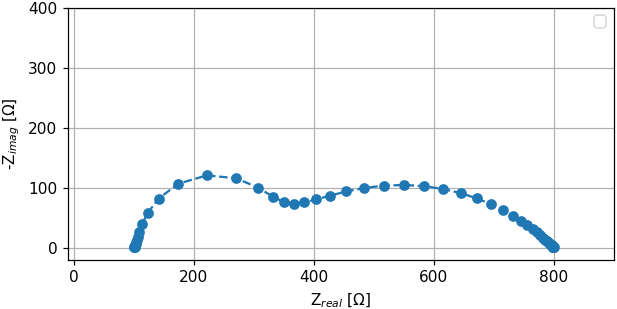

In [18]:
# 模拟理想数据
RaRCbaRWb_ecm = ECM(ecm_serial='5_100', proba=1, fre=fre_list, z_sim=RaRCbaRWb_arr_0)

In [9]:
# 存储理想数据
RaRCbaRWb_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_ecm.pkl'
pickle_file(obj=RaRCbaRWb_ecm, fn=RaRCbaRWb_ecm_pkl_fn, fp='./rbp_files/0/')

In [44]:
RaRCbaRWb_z_arr = RaRCbaRWb_arr_0

In [12]:
RaRCbaRWb_z_list = RaRCbaRWb_arr_0.tolist()

### R(RC)(RW)+轻微扰动

#### 高频

In [14]:
# High Fre --> HF + Small disturb index = 5
z1_HF_S_list = gauss_disturb_1(i=5, z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree='S')

In [20]:
# 和理想数据的图像对比
z1_HF_S_pack_list = [RaRCbaRWb_z_list, z1_HF_S_list]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z1_HF_S_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'HF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

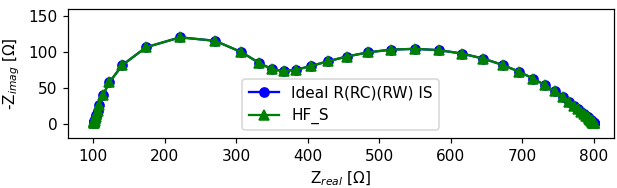

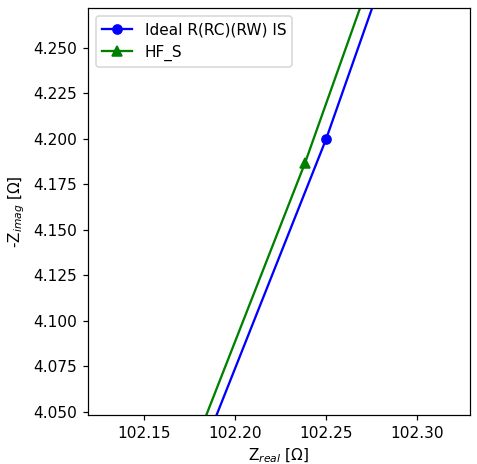

In [37]:
# save ECM
RaRCbaRWb_HF_S_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HF_S_ecm.z_sim_arr = z1_HF_S_list
RaRCbaRWb_HF_S_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HF_S_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HF_S_ecm, fn=RaRCbaRWb_HF_S_ecm_pkl_fn, fp='./rbp_files/0/R(RC)(RW)_pkl/')

#### 中频

In [31]:
# Middle Fre --> HF + Small disturb index = 25
z1_MF_S_arr = gauss_disturb_1(i=25, z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree='S')

In [32]:
RaRCbaRWb_ecm.z_sim_arr[25]

(484.24551586887264-99.39925491740706j)

In [33]:
# 和理想数据的图像对比
z1_MF_S_pack_list = [RaRCbaRWb_z_list, z1_MF_S_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z1_MF_S_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'MF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

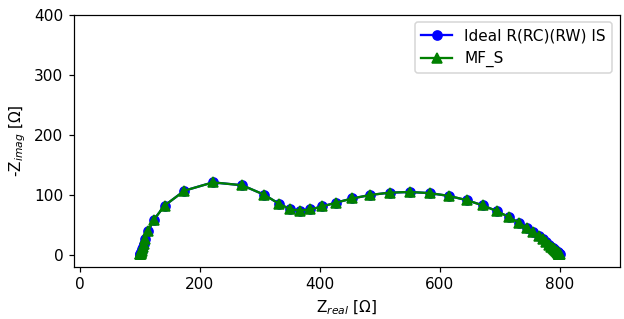

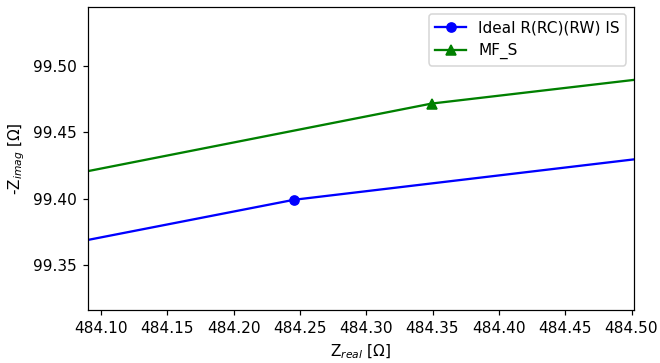

In [38]:
# save ECM
RaRCbaRWb_MF_S_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MF_S_ecm.z_sim_arr = z1_MF_S_arr
RaRCbaRWb_MF_S_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MF_S_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MF_S_ecm, fn=RaRCbaRWb_MF_S_ecm_pkl_fn, fp='./rbp_files/0/R(RC)(RW)_pkl/')

#### 低频

In [42]:
# Low Fre --> LF + Small disturb index = 55
z1_LF_S_arr = gauss_disturb_1(i=55, z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree='S')

In [41]:
RaRCbaRWb_ecm.z_sim_arr.shape, RaRCbaRWb_ecm.z_sim_arr[55]

((60,), (799.4395022838935-0.5592459038820611j))

In [45]:
# 和理想数据的图像对比
z1_LF_S_pack_list = [RaRCbaRWb_z_arr, z1_LF_S_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z1_LF_S_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'LF_S'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

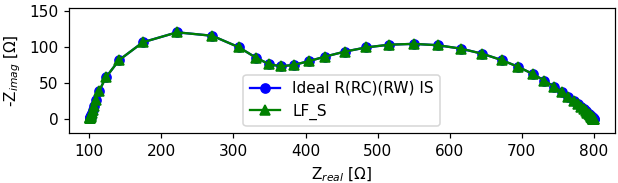

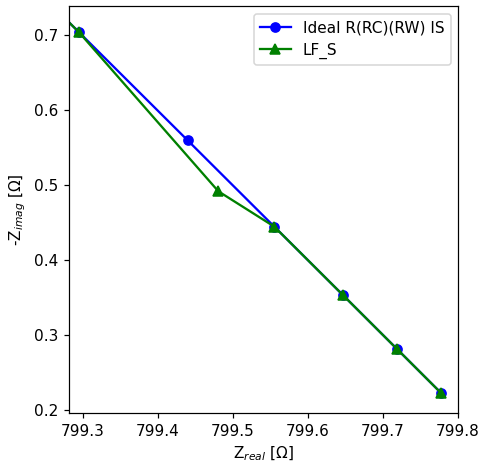

In [46]:
# save ECM
RaRCbaRWb_LF_S_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_LF_S_ecm.z_sim_arr = z1_LF_S_arr
RaRCbaRWb_LF_S_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_LF_S_ecm.pkl'
pickle_file(obj=RaRCbaRWb_LF_S_ecm, fn=RaRCbaRWb_LF_S_ecm_pkl_fn, fp='./rbp_files/0/R(RC)(RW)_pkl/')

### R(RC)(RW)+中等扰动

#### 高频

In [47]:
# High Fre --> HF + Middle disturb index = 5
z1_HF_M_arr = gauss_disturb_1(i=5, z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree='M')

In [48]:
RaRCbaRWb_ecm.z_sim_arr[5]

(102.24985453397154-4.199589469238792j)

In [49]:
# 和理想数据的图像对比
z1_HF_M_pack_list = [RaRCbaRWb_z_arr, z1_HF_M_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z1_HF_M_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'HF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

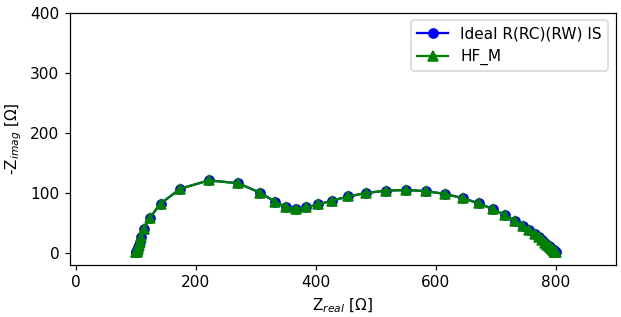

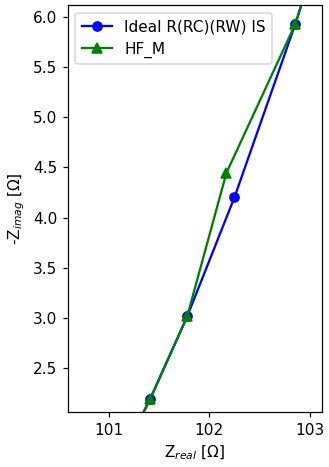

In [50]:
# save ECM
RaRCbaRWb_HF_M_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HF_M_ecm.z_sim_arr = z1_HF_M_arr
RaRCbaRWb_HF_M_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HF_M_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HF_M_ecm, fn=RaRCbaRWb_HF_M_ecm_pkl_fn, fp='./rbp_files/0/R(RC)(RW)_pkl/')

#### 中频

In [51]:
# Middle Fre --> MF + Middle disturb index = 5
z1_MF_M_arr = gauss_disturb_1(i=25, z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree='M')

In [52]:
RaRCbaRWb_ecm.z_sim_arr[25]

(484.24551586887264-99.39925491740706j)

In [53]:
# 和理想数据的图像对比
z1_MF_M_pack_list = [RaRCbaRWb_z_arr, z1_MF_M_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z1_MF_M_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'MF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

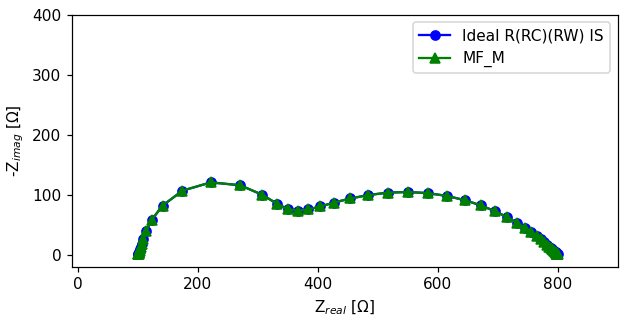

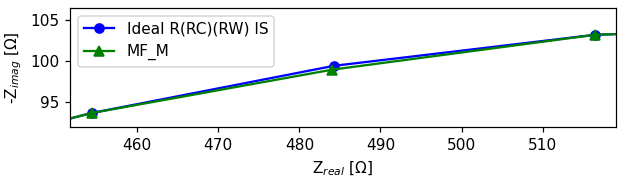

In [54]:
# save ECM
RaRCbaRWb_MF_M_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MF_M_ecm.z_sim_arr = z1_MF_M_arr
RaRCbaRWb_MF_M_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MF_M_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MF_M_ecm, fn=RaRCbaRWb_MF_M_ecm_pkl_fn, fp='./rbp_files/0/R(RC)(RW)_pkl/')

#### 低频

In [55]:
# Low Fre --> LF + Middle disturb index = 55
z1_LF_M_arr = gauss_disturb_1(i=55, z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree='M')

In [56]:
RaRCbaRWb_ecm.z_sim_arr[55]

(799.4395022838935-0.5592459038820611j)

In [57]:
# 和理想数据的图像对比
z1_LF_M_pack_list = [RaRCbaRWb_z_arr, z1_LF_M_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z1_LF_M_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'LF_M'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

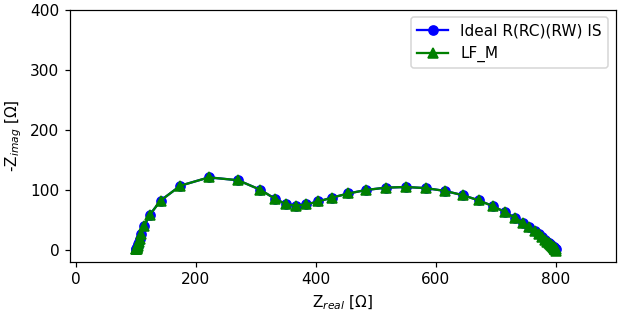

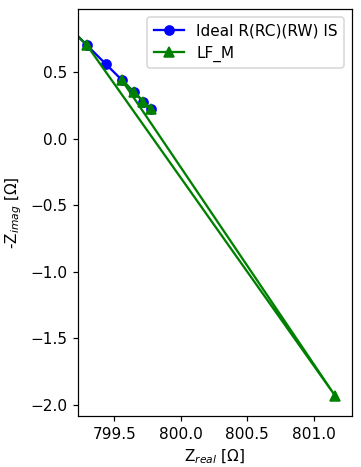

In [58]:
# save ECM
RaRCbaRWb_LF_M_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_LF_M_ecm.z_sim_arr = z1_LF_M_arr
RaRCbaRWb_LF_M_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_LF_M_ecm.pkl'
pickle_file(obj=RaRCbaRWb_LF_M_ecm, fn=RaRCbaRWb_LF_M_ecm_pkl_fn, fp='./rbp_files/0/R(RC)(RW)_pkl/')

### R(RC)(RW)+剧烈扰动

#### 高频

In [59]:
# High Fre --> HF + High disturb index = 5
z1_HF_H_arr = gauss_disturb_1(i=5, z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree='H')

In [60]:
RaRCbaRWb_ecm.z_sim_arr[5]

(102.24985453397154-4.199589469238792j)

In [61]:
# 和理想数据的图像对比
z1_HF_H_pack_list = [RaRCbaRWb_z_arr, z1_HF_H_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z1_HF_H_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'HF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

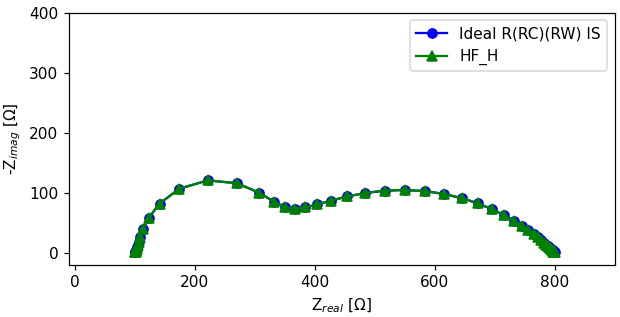

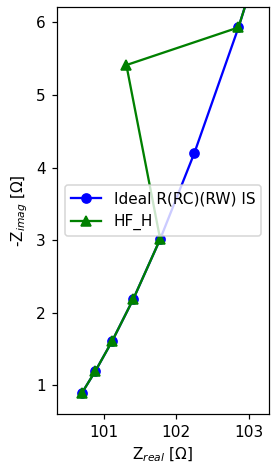

In [67]:
# save ECM
RaRCbaRWb_HF_H_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HF_H_ecm.z_sim_arr = z1_HF_H_arr
RaRCbaRWb_HF_H_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HF_H_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HF_H_ecm, fn=RaRCbaRWb_HF_H_ecm_pkl_fn, fp='./rbp_files/0/R(RC)(RW)_pkl/')

#### 中频

In [68]:
# Middle Fre --> MF + High disturb index = 25
z1_MF_H_arr = gauss_disturb_1(i=25, z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree='H')

In [69]:
RaRCbaRWb_ecm.z_sim_arr[25]

(484.24551586887264-99.39925491740706j)

In [70]:
# 和理想数据的图像对比
z1_MF_H_pack_list = [RaRCbaRWb_z_arr, z1_MF_H_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z1_MF_H_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'MF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

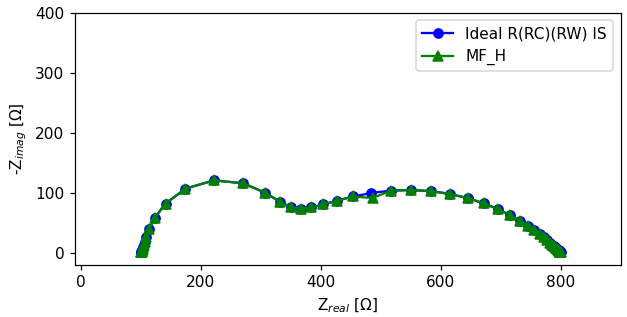

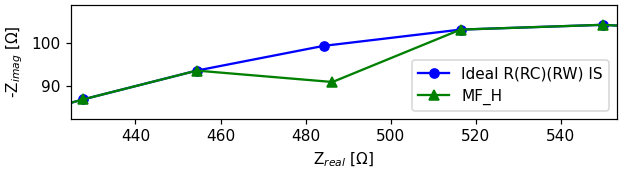

In [71]:
# save ECM
RaRCbaRWb_MF_H_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MF_H_ecm.z_sim_arr = z1_MF_H_arr
RaRCbaRWb_MF_H_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MF_H_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MF_H_ecm, fn=RaRCbaRWb_MF_H_ecm_pkl_fn, fp='./rbp_files/0/R(RC)(RW)_pkl/')

#### 低频

In [72]:
# Low Fre --> LF + High disturb index = 55
z1_LF_H_arr = gauss_disturb_1(i=55, z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree='H')

In [73]:
RaRCbaRWb_ecm.z_sim_arr[55]

(799.4395022838935-0.5592459038820611j)

In [74]:
# 和理想数据的图像对比
z1_LF_H_pack_list = [RaRCbaRWb_z_arr, z1_LF_H_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z1_LF_H_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'LF_H'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

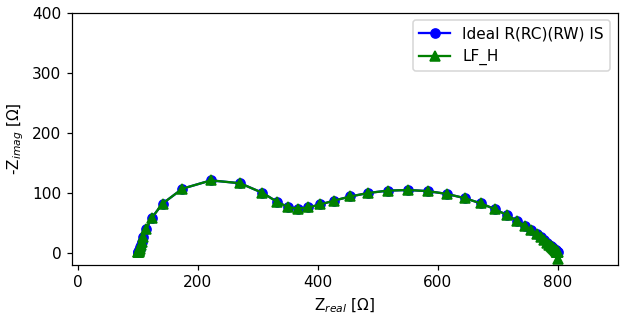

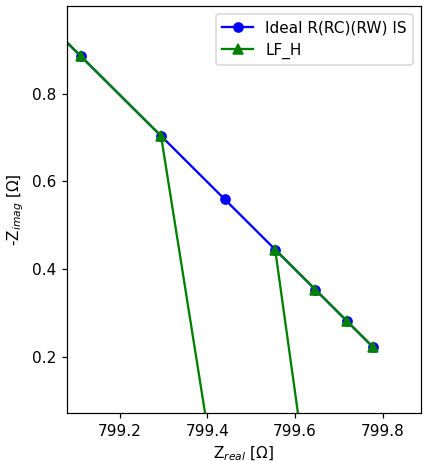

In [75]:
# save ECM
RaRCbaRWb_LF_H_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_LF_H_ecm.z_sim_arr = z1_LF_H_arr
RaRCbaRWb_LF_H_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_LF_H_ecm.pkl'
pickle_file(obj=RaRCbaRWb_LF_H_ecm, fn=RaRCbaRWb_LF_H_ecm_pkl_fn, fp='./rbp_files/0/R(RC)(RW)_pkl/')

## 准备R(RC)(RW)+2个异常点相关的IS

扰动程度组合:高/中，由于【低程度扰动】近似噪声，在单点异常实验中基本检测不出来，所以不考虑

### Fre Index=5+25, disturb degree=High+High

In [20]:
z_HMF_HH_arr = gauss_disturbTwoPoints_0(i_iter=[5,25], z_arr=RaRCbaRWb_ecm.z_sim_arr, disturb_degree_str='H_H')

In [21]:
# 和理想数据的图像对比
z_HMF_HH_pack_list = [RaRCbaRWb_arr_0, z_HMF_HH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HMF_HH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400], plot_label_list=['Ideal R(RC)(RW) IS', 'HMF_HH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

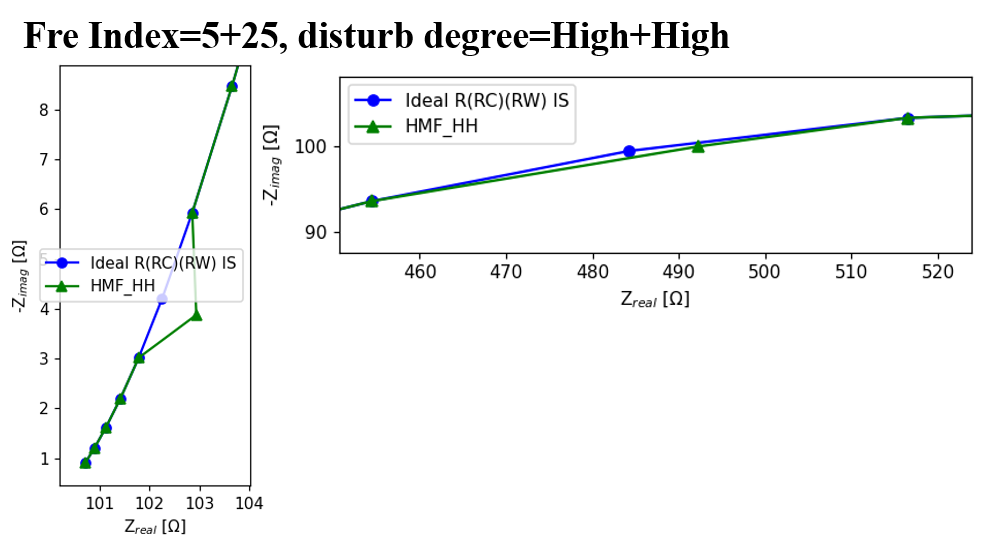

In [22]:
# save ECM
RaRCbaRWb_HMF_HH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HMF_HH_ecm.z_sim_arr = z_HMF_HH_arr
RaRCbaRWb_HMF_HH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HMF_HH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HMF_HH_ecm, fn=RaRCbaRWb_HMF_HH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=5+25, disturb degree=High+Mid

In [23]:
z_HMF_HM_arr = gauss_disturbTwoPoints_0(i_iter=[5,25],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='H_M')

In [24]:
# 和理想数据的图像对比
z_HMF_HM_pack_list = [RaRCbaRWb_arr_0, z_HMF_HM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HMF_HM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HMF_HM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

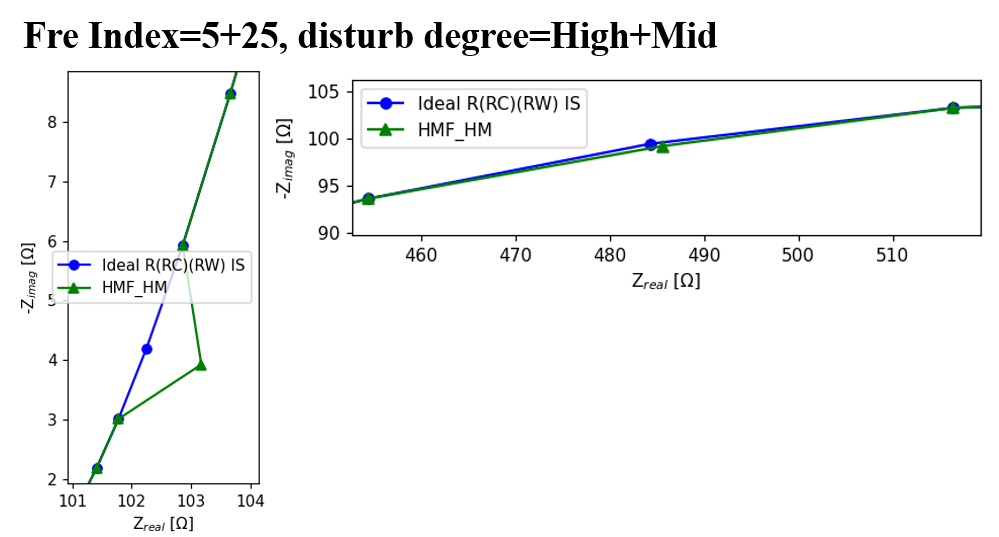

In [25]:
# save ECM
RaRCbaRWb_HMF_HM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HMF_HM_ecm.z_sim_arr = z_HMF_HM_arr
RaRCbaRWb_HMF_HM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HMF_HM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HMF_HM_ecm, fn=RaRCbaRWb_HMF_HM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=5+25, disturb degree=Mid+High

In [26]:
z_HMF_MH_arr = gauss_disturbTwoPoints_0(i_iter=[5,25],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='M_H')

In [27]:
# 和理想数据的图像对比
z_HMF_MH_pack_list = [RaRCbaRWb_arr_0, z_HMF_MH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HMF_MH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HMF_MH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

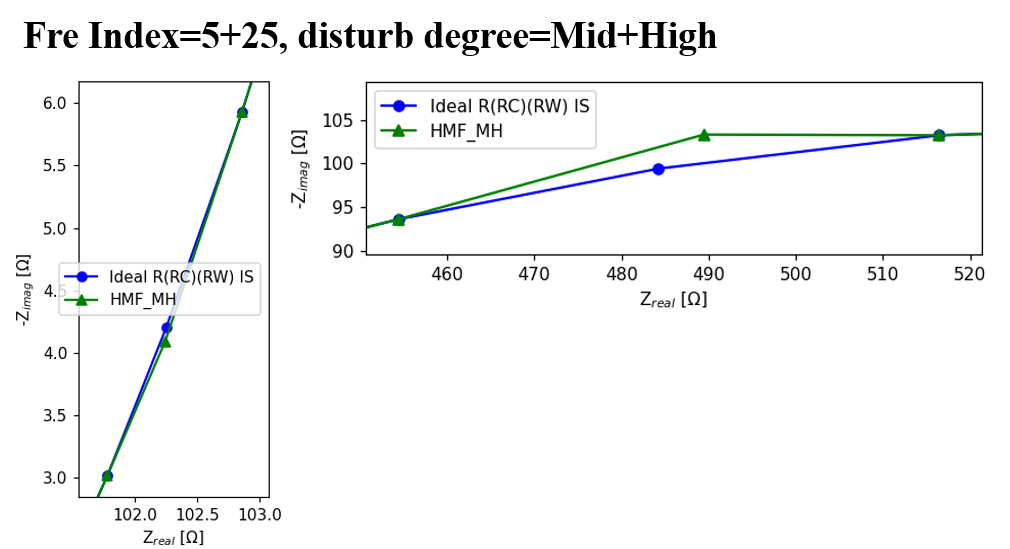

In [28]:
# save ECM
RaRCbaRWb_HMF_MH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HMF_MH_ecm.z_sim_arr = z_HMF_MH_arr
RaRCbaRWb_HMF_MH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HMF_MH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HMF_MH_ecm, fn=RaRCbaRWb_HMF_MH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=5+25, disturb degree=Mid+Mid

In [29]:
z_HMF_MM_arr = gauss_disturbTwoPoints_0(i_iter=[5,25],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='M_M')

In [30]:
# 和理想数据的图像对比
z_HMF_MM_pack_list = [RaRCbaRWb_arr_0, z_HMF_MM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HMF_MM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HMF_MM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

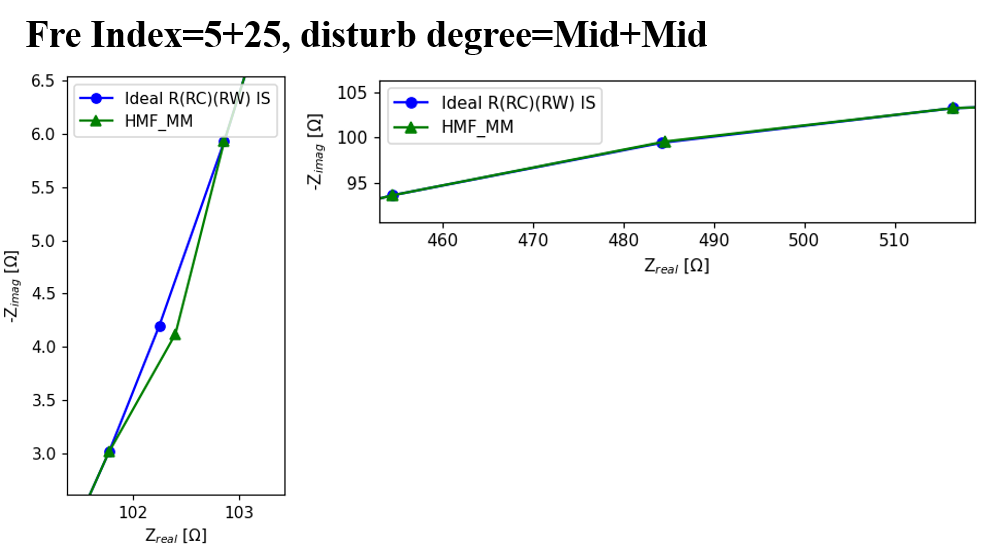

In [31]:
# save ECM
RaRCbaRWb_HMF_MM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HMF_MM_ecm.z_sim_arr = z_HMF_MM_arr
RaRCbaRWb_HMF_MM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HMF_MM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HMF_MM_ecm, fn=RaRCbaRWb_HMF_MM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=5+55, disturb degree=High+High

In [32]:
z_HLF_HH_arr = gauss_disturbTwoPoints_0(i_iter=[5,55],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='H_H')

In [33]:
# 和理想数据的图像对比
z_HLF_HH_pack_list = [RaRCbaRWb_arr_0, z_HLF_HH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HLF_HH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HLF_HH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

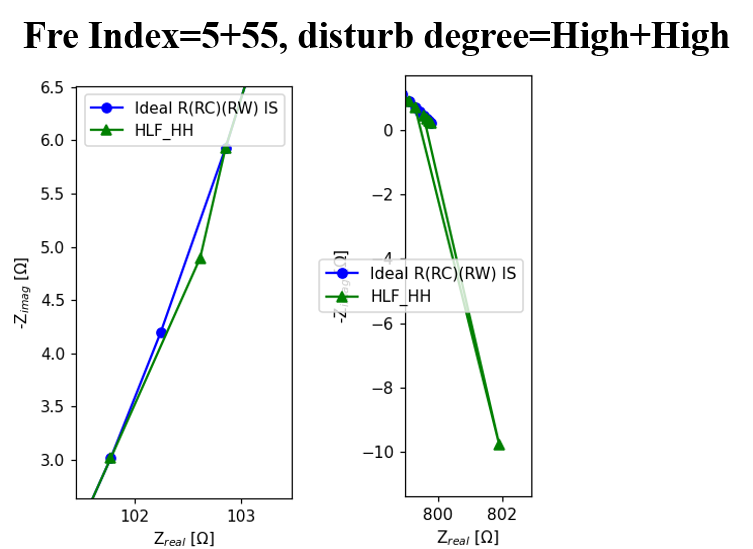

In [34]:
# save ECM
RaRCbaRWb_HLF_HH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HLF_HH_ecm.z_sim_arr = z_HLF_HH_arr
RaRCbaRWb_HLF_HH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HLF_HH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HLF_HH_ecm, fn=RaRCbaRWb_HLF_HH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=5+55, disturb degree=High+Mid

In [35]:
z_HLF_HM_arr = gauss_disturbTwoPoints_0(i_iter=[5,55],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='H_M')

In [36]:
# 和理想数据的图像对比
z_HLF_HM_pack_list = [RaRCbaRWb_arr_0, z_HLF_HM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HLF_HM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HLF_HM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

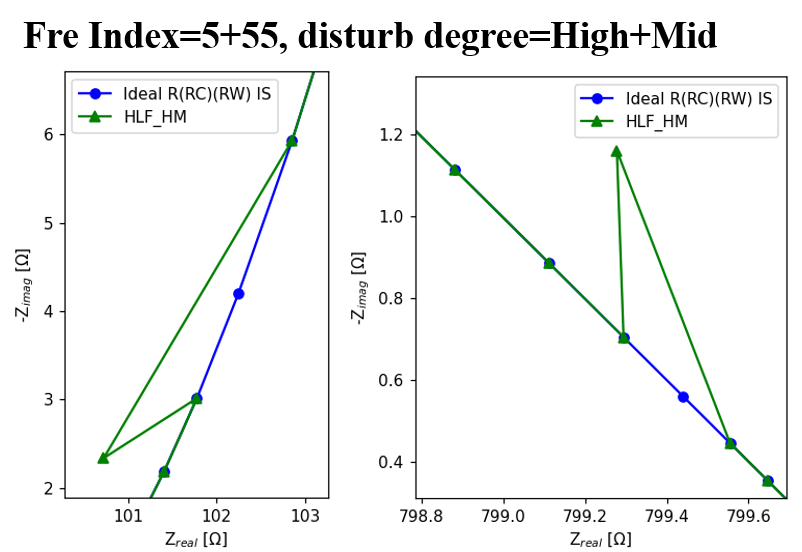

In [37]:
# save ECM
RaRCbaRWb_HLF_HM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HLF_HM_ecm.z_sim_arr = z_HLF_HM_arr
RaRCbaRWb_HLF_HM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HLF_HM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HLF_HM_ecm, fn=RaRCbaRWb_HLF_HM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=5+55, disturb degree=Mid+High

In [38]:
z_HLF_MH_arr = gauss_disturbTwoPoints_0(i_iter=[5,55],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='M_H')

In [39]:
# 和理想数据的图像对比
z_HLF_MH_pack_list = [RaRCbaRWb_arr_0, z_HLF_MH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HLF_MH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HLF_MH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

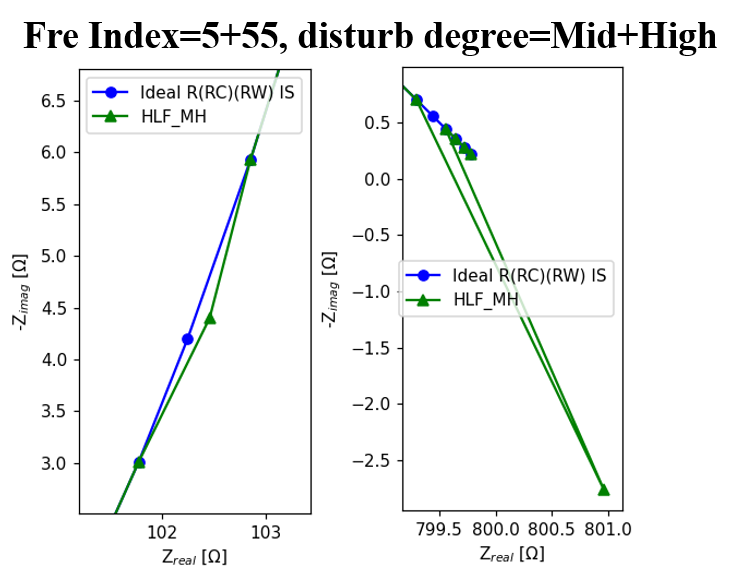

In [40]:
# save ECM
RaRCbaRWb_HLF_MH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HLF_MH_ecm.z_sim_arr = z_HLF_MH_arr
RaRCbaRWb_HLF_MH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HLF_MH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HLF_MH_ecm, fn=RaRCbaRWb_HLF_MH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=5+55, disturb degree=Mid+Mid

In [41]:
z_HLF_MM_arr = gauss_disturbTwoPoints_0(i_iter=[5,55],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='M_M')

In [42]:
# 和理想数据的图像对比
z_HLF_MM_pack_list = [RaRCbaRWb_arr_0, z_HLF_MM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HLF_MM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HLF_MM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

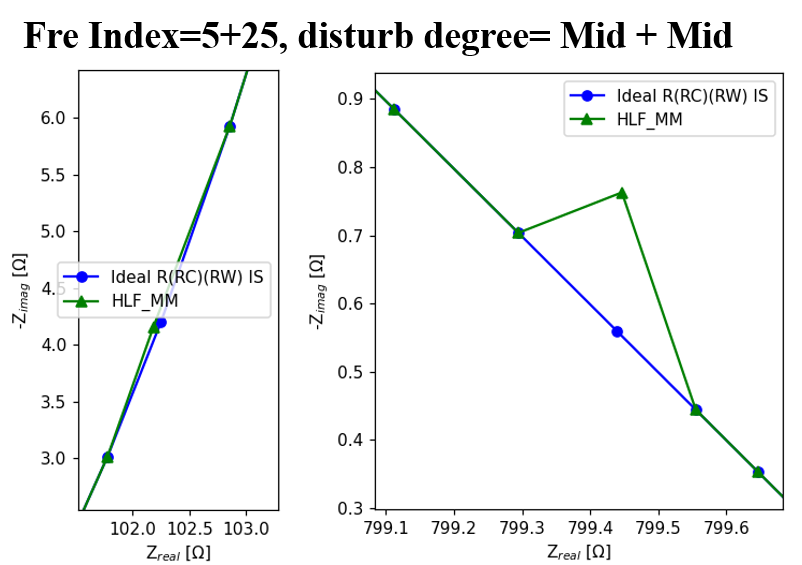

In [43]:
# save ECM
RaRCbaRWb_HLF_MM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HLF_MM_ecm.z_sim_arr = z_HLF_MM_arr
RaRCbaRWb_HLF_MM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HLF_MM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HLF_MM_ecm, fn=RaRCbaRWb_HLF_MM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=25+55, disturb degree=High+High

In [44]:
z_MLF_HH_arr = gauss_disturbTwoPoints_0(i_iter=[25,55],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='H_H')

In [45]:
# 和理想数据的图像对比
z_MLF_HH_pack_list = [RaRCbaRWb_arr_0, z_MLF_HH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_MLF_HH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'MLF_HH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

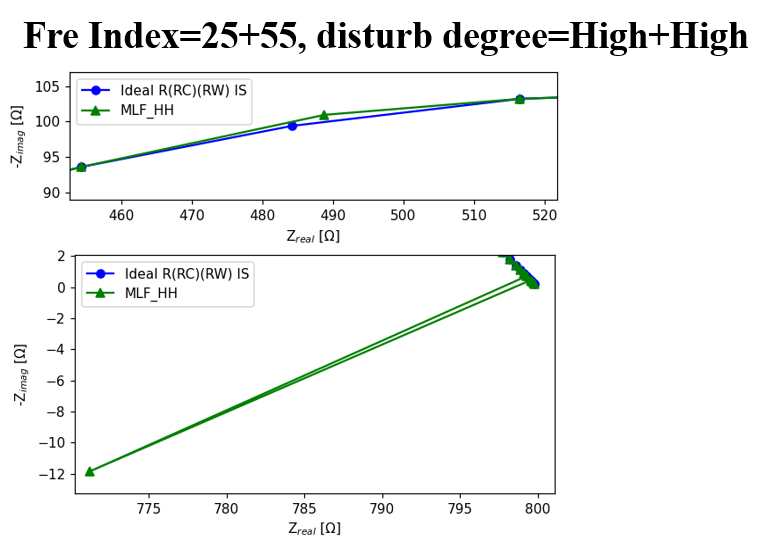

In [46]:
# save ECM
RaRCbaRWb_MLF_HH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MLF_HH_ecm.z_sim_arr = z_MLF_HH_arr
RaRCbaRWb_MLF_HH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MLF_HH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MLF_HH_ecm, fn=RaRCbaRWb_MLF_HH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=25+55, disturb degree=High+Mid

In [47]:
z_MLF_HM_arr = gauss_disturbTwoPoints_0(i_iter=[25,55],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='H_M')

In [48]:
# 和理想数据的图像对比
z_MLF_HM_pack_list = [RaRCbaRWb_arr_0, z_MLF_HM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_MLF_HM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'MLF_HM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

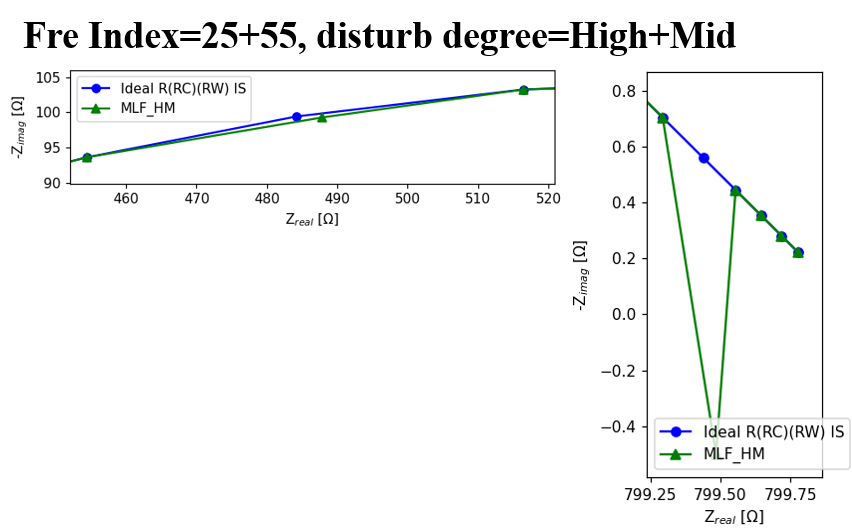

In [49]:
# save ECM
RaRCbaRWb_MLF_HM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MLF_HM_ecm.z_sim_arr = z_MLF_HM_arr
RaRCbaRWb_MLF_HM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MLF_HM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MLF_HM_ecm, fn=RaRCbaRWb_MLF_HM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=25+55, disturb degree=Mid+High

In [50]:
z_MLF_MH_arr = gauss_disturbTwoPoints_0(i_iter=[25,55],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='M_H')

In [51]:
# 和理想数据的图像对比
z_MLF_MH_pack_list = [RaRCbaRWb_arr_0, z_MLF_MH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_MLF_MH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'MLF_MH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

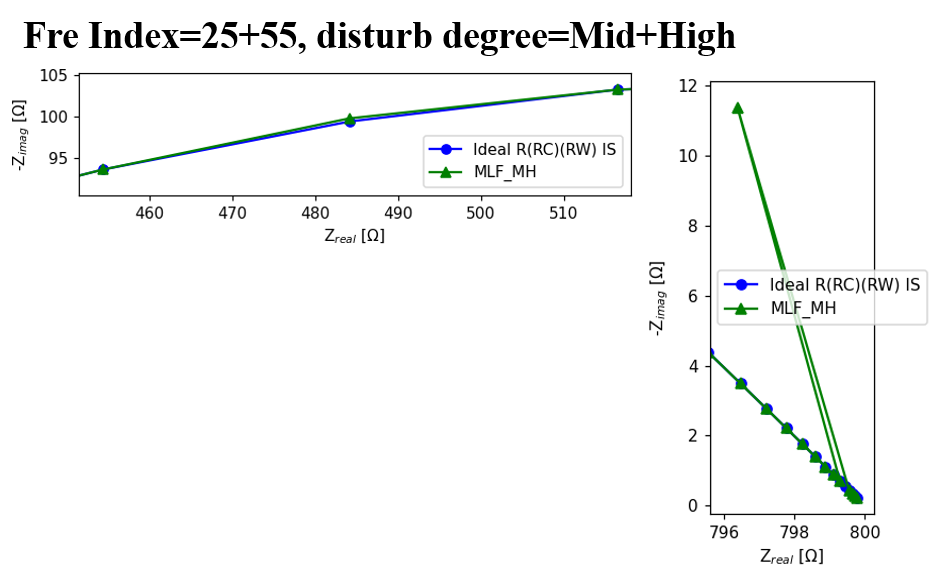

In [52]:
# save ECM
RaRCbaRWb_MLF_MH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MLF_MH_ecm.z_sim_arr = z_MLF_MH_arr
RaRCbaRWb_MLF_MH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MLF_MH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MLF_MH_ecm, fn=RaRCbaRWb_MLF_MH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

### Fre Index=25+55, disturb degree=Mid+Mid

In [53]:
z_MLF_MM_arr = gauss_disturbTwoPoints_0(i_iter=[25,55],
                                        z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                        disturb_degree_str='M_M')

In [54]:
# 和理想数据的图像对比
z_MLF_MM_pack_list = [RaRCbaRWb_arr_0, z_MLF_MM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_MLF_MM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'MLF_MM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

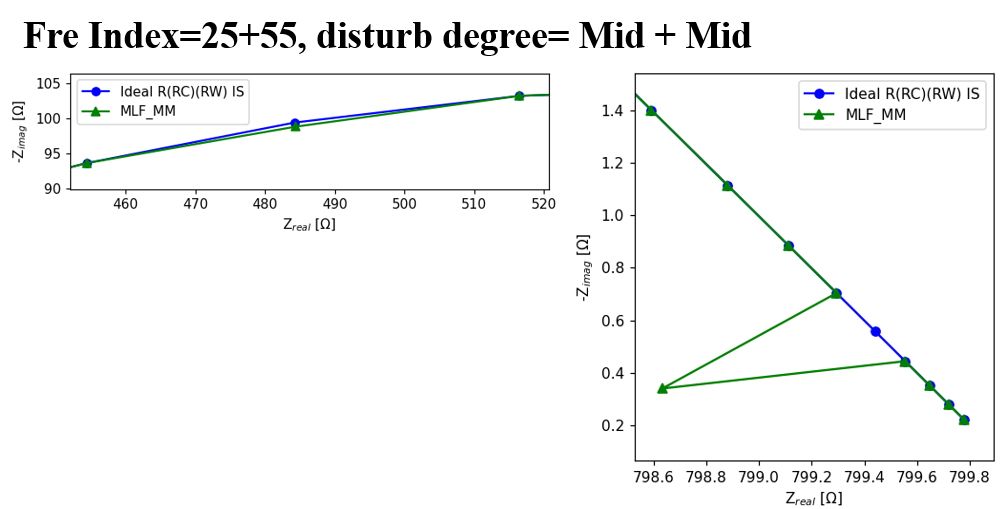

In [55]:
# save ECM
RaRCbaRWb_MLF_MM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MLF_MM_ecm.z_sim_arr = z_MLF_MM_arr
RaRCbaRWb_MLF_MM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MLF_MM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MLF_MM_ecm, fn=RaRCbaRWb_MLF_MM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/twoOutliers/')

## 准备R(RC)(RW)+3个异常点相关的IS

### Fre=5/25/55,Disturb=High + High + High

In [56]:
z_HHH_arr = gauss_disturbThreePoints_0(z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                       disturb_degree_str='H_H_H')

In [57]:
# 和理想数据的图像对比
z_HHH_pack_list = [RaRCbaRWb_arr_0, z_HHH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HHH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HHH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

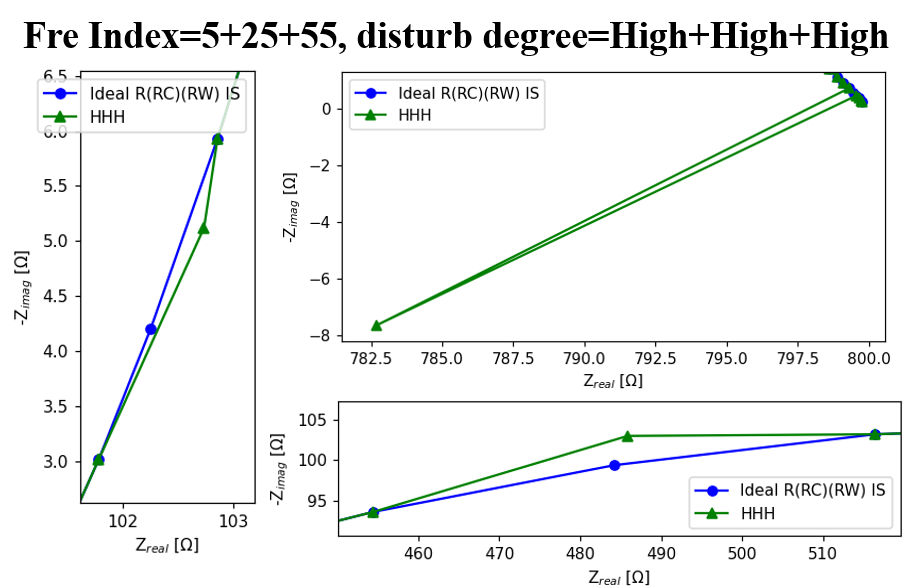

In [58]:
# save ECM
RaRCbaRWb_HHH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HHH_ecm.z_sim_arr = z_HHH_arr
RaRCbaRWb_HHH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HHH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HHH_ecm, fn=RaRCbaRWb_HHH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/threeOutliers/')

### Fre=5/25/55,Disturb=High + High + Mid

In [59]:
z_HHM_arr = gauss_disturbThreePoints_0(z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                       disturb_degree_str='H_H_M')

In [60]:
# 和理想数据的图像对比
z_HHM_pack_list = [RaRCbaRWb_arr_0, z_HHM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HHM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HHM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

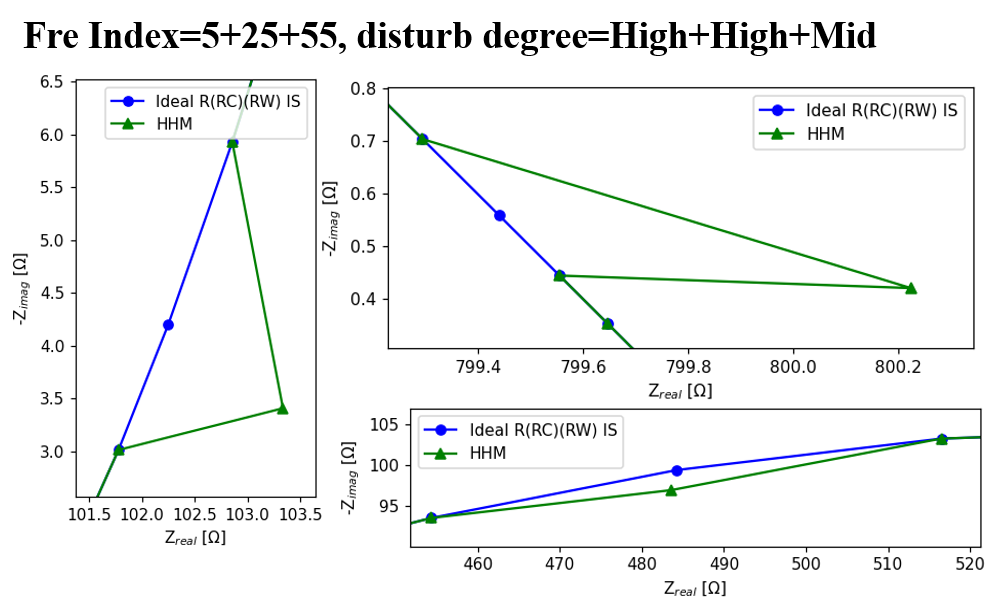

In [61]:
# save ECM
RaRCbaRWb_HHM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HHM_ecm.z_sim_arr = z_HHM_arr
RaRCbaRWb_HHM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HHM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HHM_ecm, fn=RaRCbaRWb_HHM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/threeOutliers/')

### Fre=5/25/55,Disturb=High + Mid + High

In [62]:
z_HMH_arr = gauss_disturbThreePoints_0(z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                       disturb_degree_str='H_M_H')

In [63]:
# 和理想数据的图像对比
z_HMH_pack_list = [RaRCbaRWb_arr_0, z_HMH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HMH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HMH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

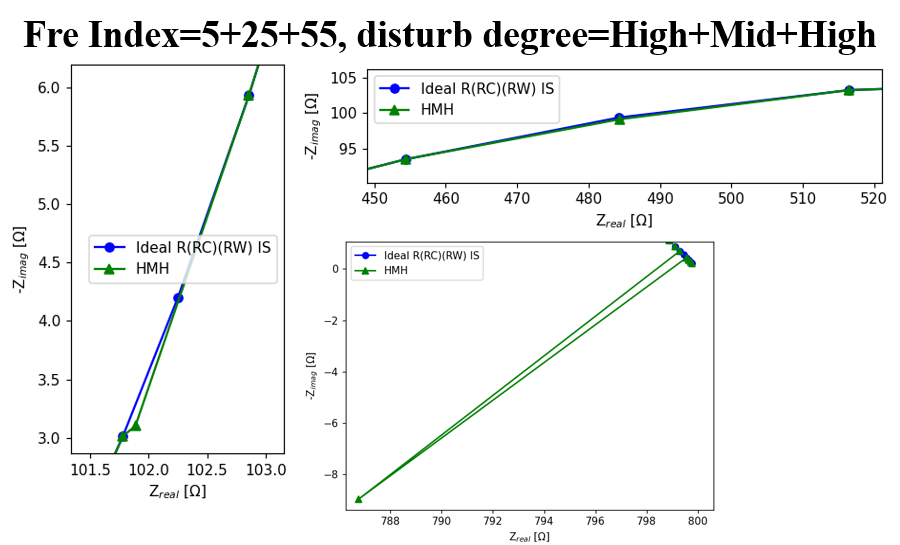

In [64]:
# save ECM
RaRCbaRWb_HMH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HMH_ecm.z_sim_arr = z_HMH_arr
RaRCbaRWb_HMH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HMH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HMH_ecm, fn=RaRCbaRWb_HMH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/threeOutliers/')

### Fre=5/25/55,Disturb=High + Mid + Mid

In [65]:
z_HMM_arr = gauss_disturbThreePoints_0(z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                       disturb_degree_str='H_M_M')

In [66]:
# 和理想数据的图像对比
z_HMM_pack_list = [RaRCbaRWb_arr_0, z_HMM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_HMM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'HMM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

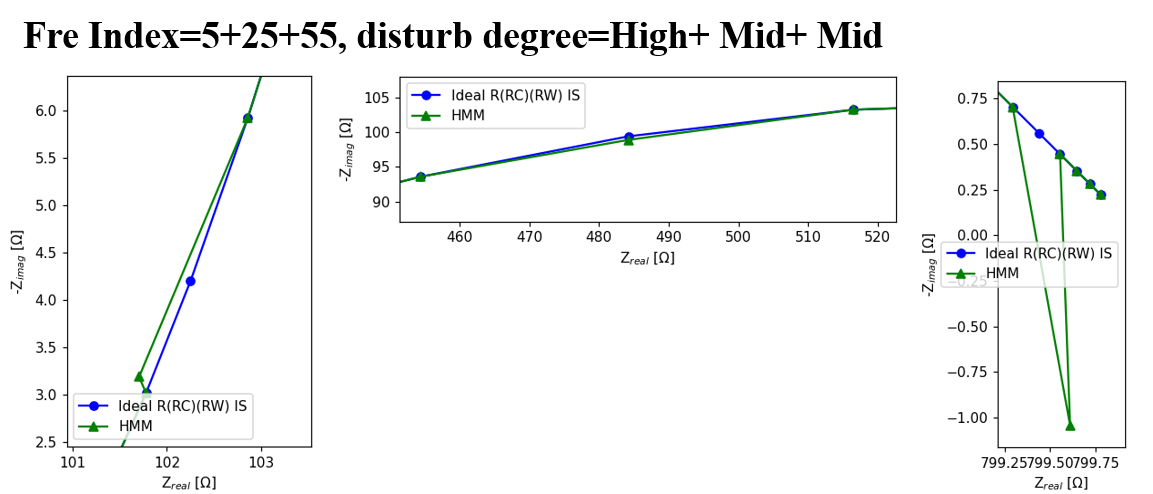

In [67]:
# save ECM
RaRCbaRWb_HMM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_HMM_ecm.z_sim_arr = z_HMM_arr
RaRCbaRWb_HMM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_HMM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_HMM_ecm, fn=RaRCbaRWb_HMM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/threeOutliers/')

### Fre=5/25/55,Disturb=Mid + High + High

In [68]:
z_MHH_arr = gauss_disturbThreePoints_0(z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                       disturb_degree_str='M_H_H')

In [69]:
# 和理想数据的图像对比
z_MHH_pack_list = [RaRCbaRWb_arr_0, z_MHH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_MHH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'MHH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

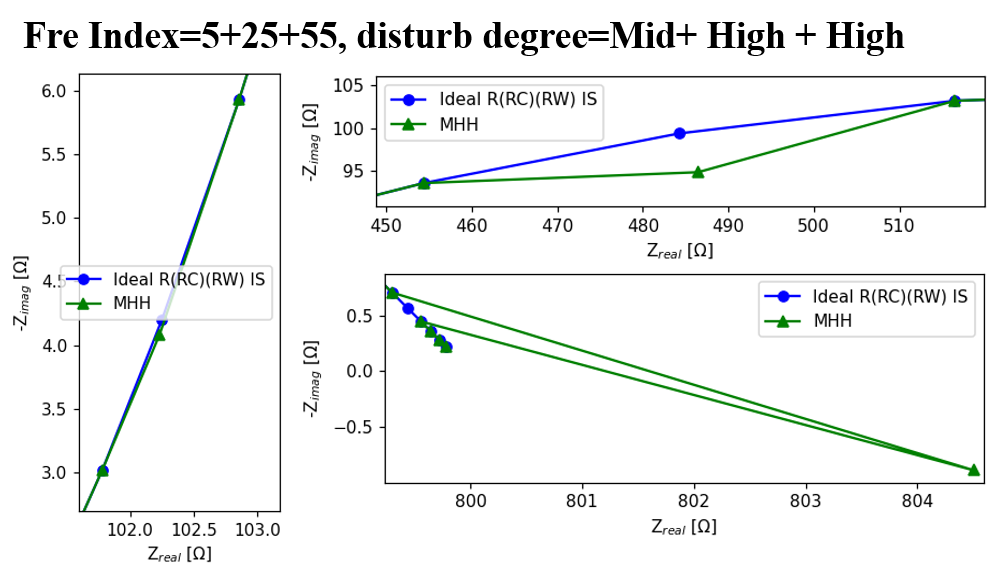

In [72]:
# save ECM
RaRCbaRWb_MHH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MHH_ecm.z_sim_arr = z_MHH_arr
RaRCbaRWb_MHH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MHH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MHH_ecm, fn=RaRCbaRWb_MHH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/threeOutliers/')

### Fre=5/25/55,Disturb=Mid + High + Mid

In [73]:
z_MHM_arr = gauss_disturbThreePoints_0(z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                       disturb_degree_str='M_H_M')

In [79]:
# 和理想数据的图像对比
z_MHM_pack_list = [RaRCbaRWb_arr_0, z_MHM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_MHM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'MHM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

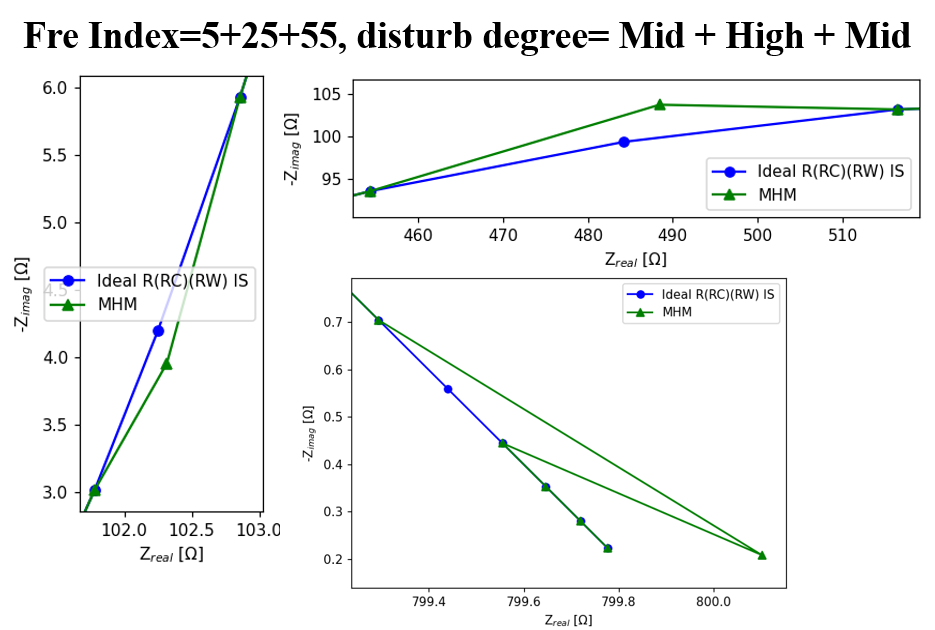

In [75]:
# save ECM
RaRCbaRWb_MHM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MHM_ecm.z_sim_arr = z_MHM_arr
RaRCbaRWb_MHM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MHM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MHM_ecm, fn=RaRCbaRWb_MHM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/threeOutliers/')

### Fre=5/25/55,Disturb=Mid + Mid + High

In [76]:
z_MMH_arr = gauss_disturbThreePoints_0(z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                       disturb_degree_str='M_M_H')

In [77]:
# 和理想数据的图像对比
z_MMH_pack_list = [RaRCbaRWb_arr_0, z_MMH_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_MMH_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'MMH'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

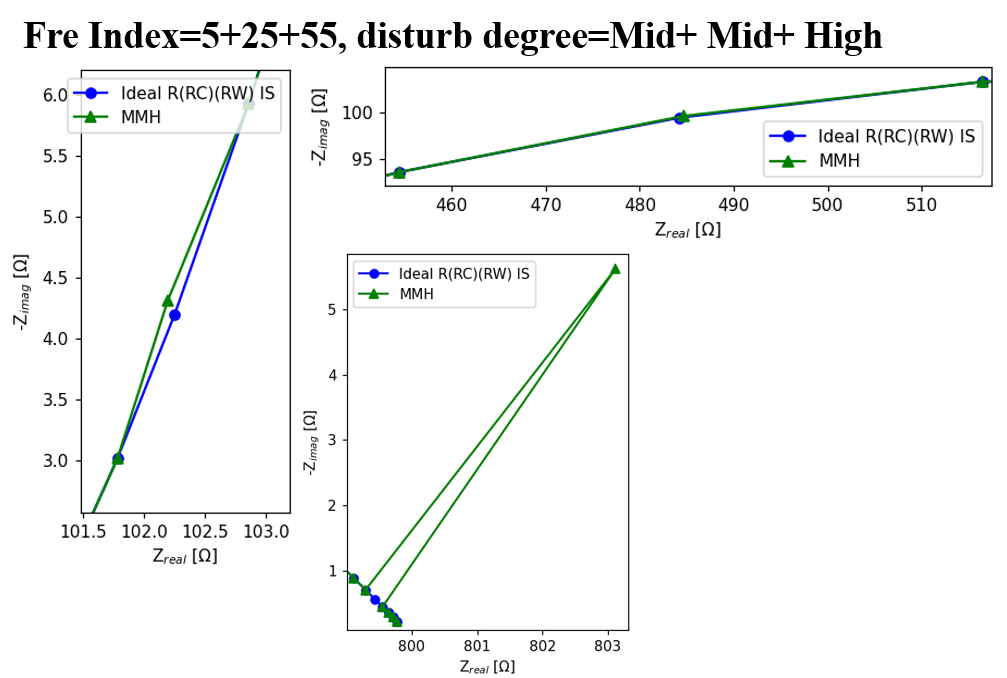

In [78]:
# save ECM
RaRCbaRWb_MMH_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MMH_ecm.z_sim_arr = z_MMH_arr
RaRCbaRWb_MMH_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MMH_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MMH_ecm, fn=RaRCbaRWb_MMH_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/threeOutliers/')

### Fre=5/25/55,Disturb=Mid + Mid + Mid

In [80]:
z_MMM_arr = gauss_disturbThreePoints_0(z_arr=RaRCbaRWb_ecm.z_sim_arr,
                                       disturb_degree_str='M_M_M')

In [81]:
# 和理想数据的图像对比
z_MMM_pack_list = [RaRCbaRWb_arr_0, z_MMM_arr]
%matplotlib widget
nyquist_multiPlots_0(z_pack_list=z_MMM_pack_list, x_lim=[-10, 900], y_lim=[-20, 400],
                     plot_label_list=['Ideal R(RC)(RW) IS', 'MMM'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

异常点放大的img

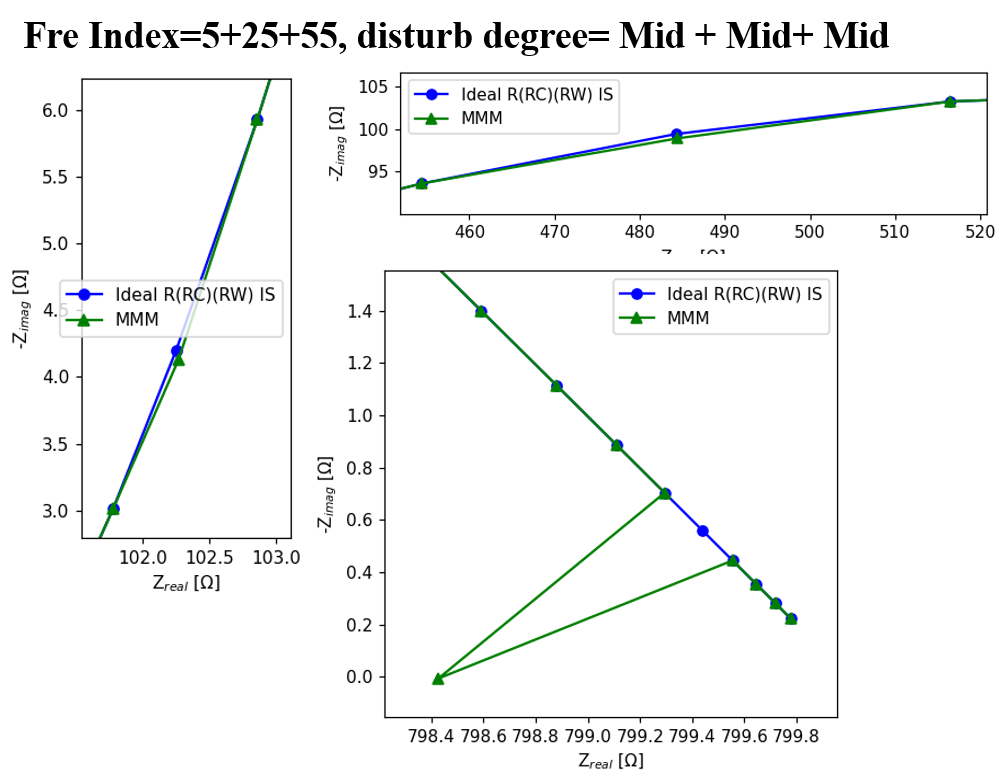

In [82]:
# save ECM
RaRCbaRWb_MMM_ecm = copy.deepcopy(RaRCbaRWb_ecm)
RaRCbaRWb_MMM_ecm.z_sim_arr = z_MMM_arr
RaRCbaRWb_MMM_ecm_pkl_fn = get_date_prefix() + 'R(RC)(RW)_MMM_ecm.pkl'
pickle_file(obj=RaRCbaRWb_MMM_ecm, fn=RaRCbaRWb_MMM_ecm_pkl_fn, 
            fp='./rbp_files/0/R(RC)(RW)_pkl/threeOutliers/')

## 准备其他ECM相关的IS

# 实验

## R(RC)实验

### 加载实验数据

### R(RC)+轻微扰动

加载实验数据-高/中/低

In [33]:
ecm_RaRCb_HF_S = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_05_ecm_HF_S.pkl')
ecm_RaRCb_MF_S = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_05_ecm_MF_S.pkl')
ecm_RaRCb_LF_S = load_pickle_file(fp='./rbp_files/0/', fn='2021_08_05_ecm_LF_S.pkl')

#### 高频

#### 中频

#### 低频

### R(RC)+中等扰动

### R(RC)+剧烈扰动

# 打印生成的理想数据用于画图

In [23]:
def calPhase(z):
    """
    :param
        z: 3+4j
    :return:
        phase: 45°
    """
    phase = np.arctan2(z.imag, z.real) * 180 / np.pi
    return phase

In [24]:
def printNy(fp, fn):
    ecm = load_pickle_file(fp, fn)
#     print('Z-Real\n',ecm.z_sim_arr.real)
#     print('-1 * Z-Imag\n',ecm.z_sim_arr.imag * (-1))
    phaseArr = calPhase(ecm.z_sim_arr)
    print('Fre, Z-Real, -1 * Z-Imag, |Z|, Phi')
    for f, zr, nzi, absZ, phase in zip(ecm.fre_arr, ecm.z_sim_arr.real, ecm.z_sim_arr.imag * (-1), np.abs(ecm.z_sim_arr), phaseArr):
        print(f, zr, nzi, absZ, phase)

In [25]:
# Ideal
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/', fn='2021_09_14_R(RC)(RW)_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 102.24985453397154 4.199589469238792 102.33606062346001 -2.3519210912701523
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112

In [27]:
# HF-BD
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', fn='2021_09_15_R(RC)(RW)_HF_H_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 101.31405477608249 5.410569688177609 101.45842478336468 -3.0569164811537233
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112

In [28]:
# HF-MD
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', fn='2021_09_15_R(RC)(RW)_HF_M_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 102.17007388580654 4.443513316856961 102.26665540843825 -2.490300828225788
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112.

In [29]:
# HF-SD
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', fn='2021_09_15_R(RC)(RW)_HF_S_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 102.23838916171637 4.186796726738885 102.32408067123592 -2.345027360771877
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112.

In [30]:
# MF-BD
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', fn='2021_09_15_R(RC)(RW)_MF_H_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 102.24985453397154 4.199589469238792 102.33606062346001 -2.3519210912701523
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112

In [31]:
# MF-MD
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', fn='2021_09_15_R(RC)(RW)_MF_M_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 102.24985453397154 4.199589469238792 102.33606062346001 -2.3519210912701523
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112

In [32]:
# MF-SD
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', fn='2021_09_15_R(RC)(RW)_MF_S_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 102.24985453397154 4.199589469238792 102.33606062346001 -2.3519210912701523
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112

In [33]:
# LF-BD
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', fn='2021_09_15_R(RC)(RW)_LF_H_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 102.24985453397154 4.199589469238792 102.33606062346001 -2.3519210912701523
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112

In [34]:
# LF-MD
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', fn='2021_09_15_R(RC)(RW)_LF_M_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 102.24985453397154 4.199589469238792 102.33606062346001 -2.3519210912701523
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112

In [35]:
# LF-SD
printNy(fp='./rbp_files/0/R(RC)(RW)_pkl/oneOutlier/', fn='2021_09_15_R(RC)(RW)_LF_S_ecm.pkl')

Fre, Z-Real, -1 * Z-Imag, |Z|, Phi
1000000.0 100.70543207403146 0.902193830701016 100.70947325314297 -0.5132842875506287
630957.344480193 100.88833225913937 1.1999970073454111 100.89546857440199 -0.6814615757268719
398107.1705534969 101.11896277875337 1.612460027240641 101.13181824129515 -0.9135707300209693
251188.6431509582 101.4102469465531 2.1912315974317043 101.43391780698637 -1.2378314096500382
158489.3192461114 101.7793089901702 3.014167483083411 101.82393109742236 -1.69630366145949
100000.0 102.24985453397154 4.199589469238792 102.33606062346001 -2.3519210912701523
63095.7344480193 102.85712001868974 5.92850692786265 103.0278328071248 -3.2987800666310427
39810.71705534969 103.65899350424456 8.479059936565552 104.00519886871467 -4.676248121632681
25118.864315095823 104.76220019492078 12.278938053676441 105.47933877971877 -6.685006622368056
15848.93192461114 106.38525605274754 17.98102310825582 107.89411428538763 -9.593352321334967
10000.0 109.00918219439028 26.555679876515224 112

# 随意的测试

In [4]:
import numpy as np
from circuits.circuit_pack import RaRCbaRCb, aRCb
from utils.frequency_generator import fre_generator

In [13]:
R0 = 10
R1 = 5
C0 = 5*1e-3
R2 = 25
C1 = 35*1e-3
RC_para_list = [[R1,C0],[R2,C1]]

fre_list, w_list = fre_generator(f_start=5, f_end=-1, pts_decade=5)
w_arr = np.array(w_list)
w_arr

array([6.28318531e+05, 3.96442192e+05, 2.50138112e+05, 1.57826479e+05,
       9.95817762e+04, 6.28318531e+04, 3.96442192e+04, 2.50138112e+04,
       1.57826479e+04, 9.95817762e+03, 6.28318531e+03, 3.96442192e+03,
       2.50138112e+03, 1.57826479e+03, 9.95817762e+02, 6.28318531e+02,
       3.96442192e+02, 2.50138112e+02, 1.57826479e+02, 9.95817762e+01,
       6.28318531e+01, 3.96442192e+01, 2.50138112e+01, 1.57826479e+01,
       9.95817762e+00, 6.28318531e+00, 3.96442192e+00, 2.50138112e+00,
       1.57826479e+00, 9.95817762e-01])

In [14]:
all_z_arr = np.array([RaRCbaRCb(w, R0, R1, C0, R2, C1) for w in w_arr])
all_z_arr

array([10.00000002-3.63782726e-04j, 10.00000005-5.76556763e-04j,
       10.00000013-9.13780876e-04j, 10.00000032-1.44824504e-03j,
       10.00000081-2.29531351e-03j, 10.00000203-3.63782598e-03j,
       10.00000511-5.76556254e-03j, 10.00001284-9.13778851e-03j,
       10.00003225-1.44823698e-02j, 10.000081  -2.29528143e-02j,
       10.00020346-3.63769825e-02j, 10.00051104-5.76505409e-02j,
       10.00128348-9.13576464e-02j, 10.00322271-1.44743158e-01j,
       10.00808727-2.29207819e-01j, 10.02026515-3.62497723e-01j,
       10.05059625-5.71472099e-01j, 10.12519251-8.93842222e-01j,
       10.30309287-1.37175111e+00j, 10.69794603-2.01624762e+00j,
       11.45027058-2.71966977e+00j, 12.54309404-3.21999775e+00j,
       13.64646824-3.38758136e+00j, 14.45685244-3.50793359e+00j,
       15.03319256-4.00396944e+00j, 15.68022418-5.16814347e+00j,
       16.86956302-7.14471639e+00j, 19.29798092-9.76111074e+00j,
       23.59183248-1.20728728e+01j, 29.20763061-1.25067832e+01j])

In [15]:
z_sim_arr = np.empty(shape=(len(RC_para_list), w_arr.shape[0]), dtype=complex)
for i, RC_list in enumerate(RC_para_list):
    R, C = RC_list
    tmp_z_sim_list = [aRCb(w, R0=R, C0=C) for w in w_arr]
    # IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed
    z_sim_arr[i, :] = tmp_z_sim_list
z_sim_arr = z_sim_arr.sum(axis=0)
z_sim_arr += R0

In [16]:
z_sim_arr

array([10.00000002-3.63782726e-04j, 10.00000005-5.76556763e-04j,
       10.00000013-9.13780876e-04j, 10.00000032-1.44824504e-03j,
       10.00000081-2.29531351e-03j, 10.00000203-3.63782598e-03j,
       10.00000511-5.76556254e-03j, 10.00001284-9.13778851e-03j,
       10.00003225-1.44823698e-02j, 10.000081  -2.29528143e-02j,
       10.00020346-3.63769825e-02j, 10.00051104-5.76505409e-02j,
       10.00128348-9.13576464e-02j, 10.00322271-1.44743158e-01j,
       10.00808727-2.29207819e-01j, 10.02026515-3.62497723e-01j,
       10.05059625-5.71472099e-01j, 10.12519251-8.93842222e-01j,
       10.30309287-1.37175111e+00j, 10.69794603-2.01624762e+00j,
       11.45027058-2.71966977e+00j, 12.54309404-3.21999775e+00j,
       13.64646824-3.38758136e+00j, 14.45685244-3.50793359e+00j,
       15.03319256-4.00396944e+00j, 15.68022418-5.16814347e+00j,
       16.86956302-7.14471639e+00j, 19.29798092-9.76111074e+00j,
       23.59183248-1.20728728e+01j, 29.20763061-1.25067832e+01j])

In [17]:
all_z_arr - z_sim_arr

array([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  1.77635684e-15+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        1.77635684e-15+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  1.77635684e-15+0.j, -1.77635684e-15+0.j,
       -1.77635684e-15+0.j, -1.77635684e-15+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  1.77635684e-15+0.j,  1.77635684e-15+0.j,
        0.00000000e+00+0.j, -1.77635684e-15+0.j,  0.00000000e+00+0.j,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j])

In [18]:
np.sum(all_z_arr - z_sim_arr)

(1.7763568394002505e-15+0j)

In [6]:
0 % 2

0

In [7]:
1 % 2

1

In [31]:
# *args与**kwgs
def f1(*args, **kwargs):
    print(kwargs)

In [32]:
ad = {'1':1, '2':2}
f1(ad)

{}


## Pickle

In [14]:
from utils.file_utils.pickle_utils import pickle_file

# a class pickle itself
class C:
    def __init__(self):
        print('a class is created')
    def save(self):
        pickle_file(obj=self, fn='me', fp='./')

In [15]:
c = C()

a class is created


In [16]:
c.save()

In [17]:
from utils.file_utils.pickle_utils import load_pickle_file

In [19]:
c1 = load_pickle_file(fp='./',fn='me')

In [20]:
dir(c1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'save']

## Numpy

In [21]:
import numpy as np

In [22]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
type(a)

numpy.ndarray

In [24]:
if a:
    print(a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [25]:
if a is not None:
    print(a)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
np.eye(1)

array([[1.]])

In [14]:
q = [1+2j, 3+4j]

In [2]:
e = np.empty(shape=(5,4), dtype=complex)
e

array([[            nan+7.56525112e-307j,
        5.96831300e-321+1.97626258e-323j,
        4.90113121e-321+6.23059725e-307j,
        2.41104035e-321+2.00272774e-307j],
       [4.44659081e-321+1.69119058e-306j,
        4.72326757e-321+1.29060531e-306j,
        4.48611606e-321+1.69120552e-306j,
        4.26872718e-321+2.00272265e-307j],
       [3.73513628e-321+3.56037960e-307j,
        5.96831300e-321+1.44635573e-307j,
        5.96831300e-321+1.42419530e-306j,
        1.69120416e-306+6.23056330e-307j],
       [1.78021527e-306+6.23057349e-307j,
        1.24610859e-306+6.23054972e-307j,
        3.22649800e-307+3.11526468e-307j,
        1.00132653e-307+6.23040373e-307j],
       [8.90110181e-308+1.11261298e-306j,
        1.29062093e-306+1.11259940e-306j,
        7.56603882e-307+3.11525958e-307j,
        2.13619585e-306+1.95225361e-312j]])

In [3]:
e += 2

In [4]:
e

array([[nan+7.56525112e-307j,  2.+1.97626258e-323j,  2.+6.23059725e-307j,
         2.+2.00272774e-307j],
       [ 2.+1.69119058e-306j,  2.+1.29060531e-306j,  2.+1.69120552e-306j,
         2.+2.00272265e-307j],
       [ 2.+3.56037960e-307j,  2.+1.44635573e-307j,  2.+1.42419530e-306j,
         2.+6.23056330e-307j],
       [ 2.+6.23057349e-307j,  2.+6.23054972e-307j,  2.+3.11526468e-307j,
         2.+6.23040373e-307j],
       [ 2.+1.11261298e-306j,  2.+1.11259940e-306j,  2.+3.11525958e-307j,
         2.+1.95225361e-312j]])

In [5]:
a = 1+2j
a += 2
a

(3+2j)

In [6]:
aa = np.array(a)
aa += 3

In [7]:
aa

array(6.+2.j)

In [8]:
bb = np.array(list(range(10)))

In [10]:
bb.max()

9

In [27]:
if not None:
    print(1)

1


In [28]:
if None:
    print(1)

In [21]:
q2 = np.empty((3,2), dtype=complex)

In [22]:
q2

array([[1.05193223e-311+2.42092166e-322j,
        0.00000000e+000+0.00000000e+000j],
       [0.00000000e+000+1.04082753e-047j,
        4.97646464e-091+2.74072580e-057j],
       [3.61208435e+174+2.23097205e+180j,
        6.99196247e+228+1.38160555e-047j]])

In [23]:
q2[0] = q
q2[0]

array([1.+2.j, 3.+4.j])

In [20]:
q1 = q + 1
q1

TypeError: can only concatenate list (not "int") to list

In [16]:
qq = np.array(q)
qq

array([1.+2.j, 3.+4.j])

In [17]:
ww = np.zeros((2,2))

In [18]:
ww[0] = q

TypeError: can't convert complex to float

In [ ]:
ee = np.array()

In [2]:
b = [[1,3],[2,4],[5,6]]
bb = np.array(b)

In [3]:
b[0]

[1, 3]

In [10]:
bb[:,0] = np.array(list(range(3)))

In [11]:
bb

array([[0, 3],
       [1, 4],
       [2, 6]])

In [12]:
bb[1, :] = [9,10]

In [13]:
bb

array([[ 0,  3],
       [ 9, 10],
       [ 2,  6]])

In [4]:
c = [[1],[4],[6]]
cc = np.array(c)

In [6]:
c[0]

[1]

In [7]:
cc[0]

array([1])

In [8]:
cc[0] =3

In [9]:
cc

array([[3],
       [4],
       [6]])

In [5]:
a = list(range(10))

In [ ]:
aa = np.array(a)
aa

In [ ]:
aa.shape

In [ ]:
aa[0]

In [ ]:
aa.shape[0]

In [ ]:
for i in aa:
    print(i)

## eval

In [ ]:
def f1():
    print('ok')

In [ ]:
f11 = eval('f1')

In [ ]:
f11

In [ ]:
f11()

In [ ]:
int('003')

In [ ]:
int('053')

## sort

In [60]:
a = [7,3,9,2,7,9,4,3]

In [62]:
a.sort(reverse=False)

In [63]:
a

[2, 3, 3, 4, 7, 7, 9, 9]